# COMM061: Natural Language Processing Coursework
Shubham Kandpal<br>
6812009<br>
sk02593@surrey.ac.uk<br>

# 1) Data Analysis and Visualization
## 1.1) Basic Setup Required:
#### 1.1.1) Importing Required Libraries

In [2]:
# importing required libraries
import nltk
from datasets import load_dataset, load_metric
import pandas as pd
import numpy as np
import random
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import spacy
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras import layers, Model
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
nltk.data.path.append("/path/to/your/nltk_data_directory")
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Conv1D, GlobalMaxPooling1D
import gensim.downloader

#### 1.1.2) Loading Dataset

In [3]:
# Loading the dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")

# Access the train, validation and test split
train_data = dataset["train"]
validation_data = dataset["validation"]
test_data = dataset["test"]

# Converting dictionaries to dataframes
df_train = pd.DataFrame(train_data)
df_validation = pd.DataFrame(validation_data)
df_test = pd.DataFrame(test_data)

Found cached dataset parquet (C:/Users/user/.cache/huggingface/datasets/surrey-nlp___parquet/surrey-nlp--PLOD-CW-843ef47e3e665cc1/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/3 [00:00<?, ?it/s]

#### 1.1.3) Displaying the basic dataset

In [4]:
# Printing the training dataset
df_train.head()

,tokens,pos_tags,ner_tags
0,"[For, this, purpose, the, Gothenburg, Young, P...","[ADP, DET, NOUN, DET, PROPN, PROPN, PROPN, PRO...","[B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-LF, I..."
1,"[The, following, physiological, traits, were, ...","[DET, ADJ, ADJ, NOUN, AUX, VERB, PUNCT, ADJ, N...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF..."
2,"[Minor, H, antigen, alloimmune, responses, rea...","[ADJ, PROPN, NOUN, ADJ, NOUN, ADV, VERB, ADP, ...","[B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O,..."
3,"[EPI, =, Echo, planar, imaging, .]","[PROPN, PUNCT, NOUN, NOUN, NOUN, PUNCT]","[B-AC, B-O, B-LF, I-LF, I-LF, B-O]"
4,"[Furthermore, ,, eNOS, -, derived, NO, S, -, n...","[ADV, PUNCT, PROPN, PUNCT, VERB, PROPN, NOUN, ...","[B-O, B-O, B-AC, B-O, B-O, B-AC, B-O, B-O, B-O..."


Here we can observe that the this dataset comprises sentences annotated with part-of-speech (POS) tags and named entity recognition (NER) tags. Each sentence is tokenized into words or tokens, with corresponding lists storing POS tags indicating the grammatical category of each token, such as noun, verb, or adjective. Additionally, NER tags are assigned to identify specific entities like persons, organizations, and locations within the text. This labeled dataset is valuable for training and evaluating natural language processing (NLP) models designed for tasks such as POS tagging, NER, and text classification.<br><br>
## 1.2) Analysis of Dataset 

#### 1.2.1) Finding the unique tags in the dataset

In [5]:
# Flatten the list of lists in the 'pos_tags' and 'ner_tags' column for all datasets
all_pos_tags_train = [tag for sublist in df_train['pos_tags'] for tag in sublist]
all_ner_tags_train = [tag for sublist in df_train['ner_tags'] for tag in sublist]

all_pos_tags_validation = [tag for sublist in df_validation['pos_tags'] for tag in sublist]
all_ner_tags_validation = [tag for sublist in df_validation['ner_tags'] for tag in sublist]

all_pos_tags_test = [tag for sublist in df_test['pos_tags'] for tag in sublist]
all_ner_tags_test = [tag for sublist in df_test['ner_tags'] for tag in sublist]

# Combine all tags into single lists
all_pos_tags_combined = all_pos_tags_train + all_pos_tags_validation + all_pos_tags_test
all_ner_tags_combined = all_ner_tags_train + all_ner_tags_validation + all_ner_tags_test

# Find all unique pos and ner tags
unique_pos_tags = set(all_pos_tags_combined)
unique_ner_tags = set(all_ner_tags_combined)

# Print unique pos and ner tags
print(f"The {len(unique_pos_tags)} unique tags in pos_tags: {unique_pos_tags}")
print(f"The {len(unique_ner_tags)} unique tags in ner_tags: {unique_ner_tags}")

The 17 unique tags in pos_tags: {'ADP', 'SCONJ', 'ADV', 'NOUN', 'ADJ', 'VERB', 'NUM', 'PRON', 'PROPN', 'SYM', 'INTJ', 'AUX', 'PUNCT', 'CCONJ', 'X', 'DET', 'PART'}
The 4 unique tags in ner_tags: {'B-O', 'I-LF', 'B-AC', 'B-LF'}


#### 1.2.2) Describing the dataset

In [6]:
# Explore basic statistics of Training dataset
df_train.describe()

,tokens,pos_tags,ner_tags
count,1072,1072,1072
unique,1071,1064,978
top,"[), .]","[PROPN, PUNCT, ADJ, NOUN, NOUN, PUNCT]","[B-AC, B-O, B-LF, I-LF, I-LF, B-O]"
freq,2,5,8


In [7]:
# Explore basic statistics of Validation dataset
df_validation.describe()

,tokens,pos_tags,ner_tags
count,126,126,126
unique,126,126,125
top,"[=, Manual, Ability, Classification, System, ;...","[PUNCT, PROPN, PROPN, PROPN, PROPN, PUNCT, PRO...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, ..."
freq,1,1,2


In [8]:
# Explore basic statistics of Testing dataset
df_test.describe()

,tokens,pos_tags,ner_tags
count,153,153,153
unique,153,153,144
top,"[Abbreviations, :, GEMS, ,, Global, Enteric, M...","[NOUN, PUNCT, PROPN, PUNCT, PROPN, PROPN, PROP...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O]"
freq,1,1,4


#### 1.2.3) Finding Correlation between pos_tags and ner_tags

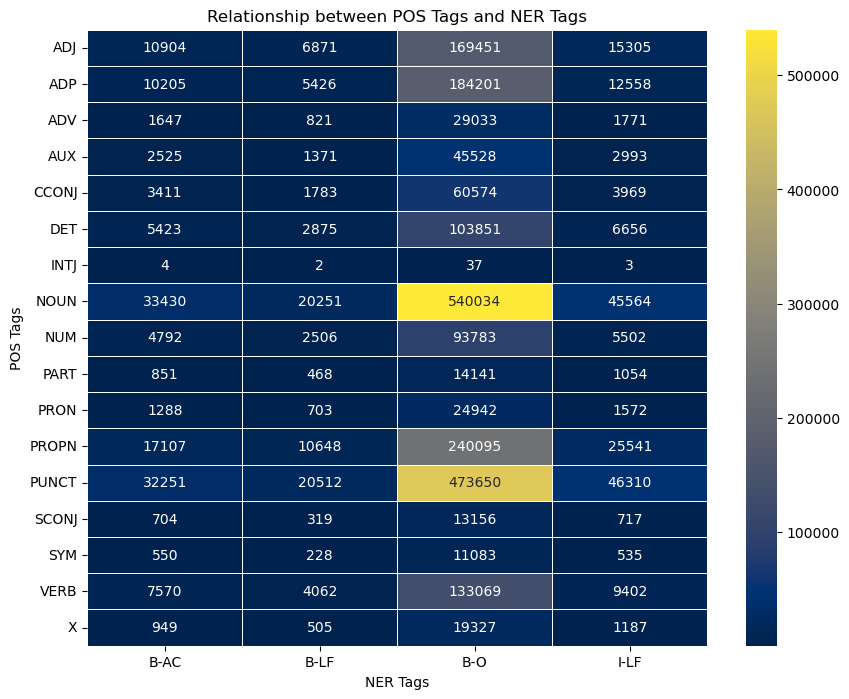

In [9]:
# Concatenate all three datasets vertically
df_combined = pd.concat([df_train, df_validation, df_test], ignore_index=True)

# Explode the lists in the 'pos_tags' and 'ner_tags' columns
df_combined_exploded = df_combined.explode('pos_tags').explode('ner_tags')

# Create a pivot table to count occurrences of each combination of pos_tags and ner_tags
pivot_table = df_combined_exploded.pivot_table(index='pos_tags', columns='ner_tags', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap="cividis", annot=True, fmt='d', cbar=True, linewidths=.5)
plt.title('Relationship between POS Tags and NER Tags')
plt.xlabel('NER Tags')
plt.ylabel('POS Tags')
plt.show()

#### 1.2.4) Displaying a subnet of Tokens and their respective pos and ner tags

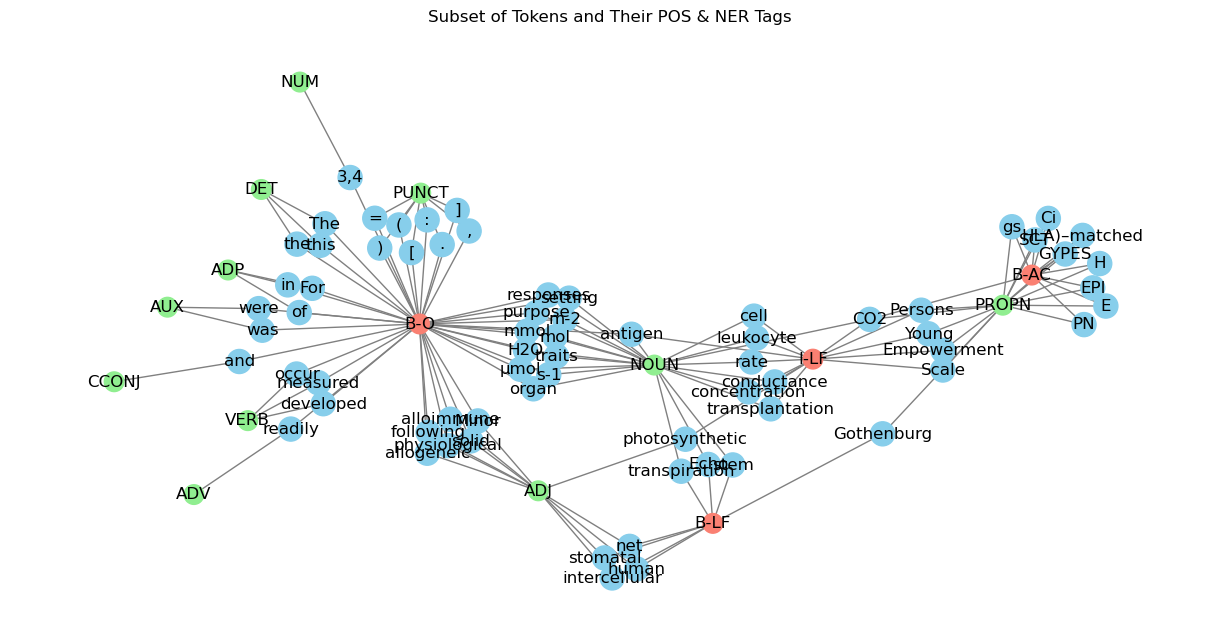

In [10]:
# Aggregating data
all_tokens = []
all_pos_tags = []
all_ner_tags = []

for _, row in df_combined.iterrows():
    tokens = row['tokens']
    pos_tags = row['pos_tags']
    ner_tags = row['ner_tags']
    
    all_tokens.extend(tokens)
    all_pos_tags.extend(pos_tags)
    all_ner_tags.extend(ner_tags)

subset_size = 100
subset_tokens = all_tokens[:subset_size]
subset_pos_tags = all_pos_tags[:subset_size]
subset_ner_tags = all_ner_tags[:subset_size]

# Initializing the graph
G = nx.Graph()

# Adding nodes and edges for each token, POS tag, and NER tag in the subset
for token, pos_tag, ner_tag in zip(subset_tokens, subset_pos_tags, subset_ner_tags):
    G.add_node(token, type='token', color='skyblue', size=300)
    G.add_node(pos_tag, type='pos_tag', color='lightgreen', size=200)
    G.add_node(ner_tag, type='ner_tag', color='salmon', size=200)
    G.add_edge(token, pos_tag, weight=0.5)
    G.add_edge(token, ner_tag, weight=0.5)

# Plotting the subnet graph
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G, seed=42)
colors = [G.nodes[node]['color'] for node in G]
sizes = [G.nodes[node]['size'] for node in G]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=sizes, edge_color='gray')
plt.title('Subset of Tokens and Their POS & NER Tags')
plt.show()

#### 1.2.5) Frequency distribution analysis 

In [11]:
# Word Frequency Analysis in "tokens" column
def word_frequency_analysis(tokens_column):
    all_words = [word for sublist in tokens_column for word in sublist]
    word_counts = Counter(all_words)
    return word_counts

# POS Tag Distribution Analysis
def pos_tag_distribution_analysis(pos_tags_column):
    all_pos_tags = [tag for sublist in pos_tags_column for tag in sublist]
    pos_tag_counts = Counter(all_pos_tags)
    return pos_tag_counts

# NER Tag Distribution Analysis
def ner_tag_distribution_analysis(ner_tags_column):
    all_ner_tags = [tag for sublist in ner_tags_column for tag in sublist]
    ner_tag_counts = Counter(all_ner_tags)
    return ner_tag_counts

# Assuming df_train is your DataFrame with columns 'tokens', 'pos_tags', and 'ner_tags'
word_frequency = word_frequency_analysis(df_combined['tokens'])
pos_tag_distribution = pos_tag_distribution_analysis(df_combined['pos_tags'])
ner_tag_distribution = ner_tag_distribution_analysis(df_combined['ner_tags'])

# Print results
print("Word Frequency Analysis on combined dataset:")
print(word_frequency.most_common(20))

print("\nPOS Tag Distribution Analysis on combined dataset:")
print(pos_tag_distribution)

print("\nNER Tag Distribution Analysis on combined dataset:")
print(ner_tag_distribution)

Word Frequency Analysis on combined dataset:
[(',', 2776), ('(', 1969), (')', 1947), ('the', 1445), ('.', 1351), ('of', 1273), ('-', 1141), ('and', 1133), (';', 796), ('in', 735), ('to', 557), (']', 470), ('[', 449), ('a', 443), ('with', 356), ('for', 288), ('were', 251), ('was', 234), ('is', 234), (':', 209)]

POS Tag Distribution Analysis on combined dataset:
Counter({'NOUN': 12543, 'PUNCT': 10975, 'PROPN': 5356, 'ADP': 4334, 'ADJ': 4055, 'VERB': 3254, 'DET': 2474, 'NUM': 1880, 'CCONJ': 1352, 'AUX': 1195, 'ADV': 732, 'PRON': 599, 'X': 371, 'PART': 358, 'SCONJ': 317, 'SYM': 204, 'INTJ': 1})

NER Tag Distribution Analysis on combined dataset:
Counter({'B-O': 41524, 'I-LF': 3846, 'B-AC': 2869, 'B-LF': 1761})


#### 1.2.6) Distribution of POS tags

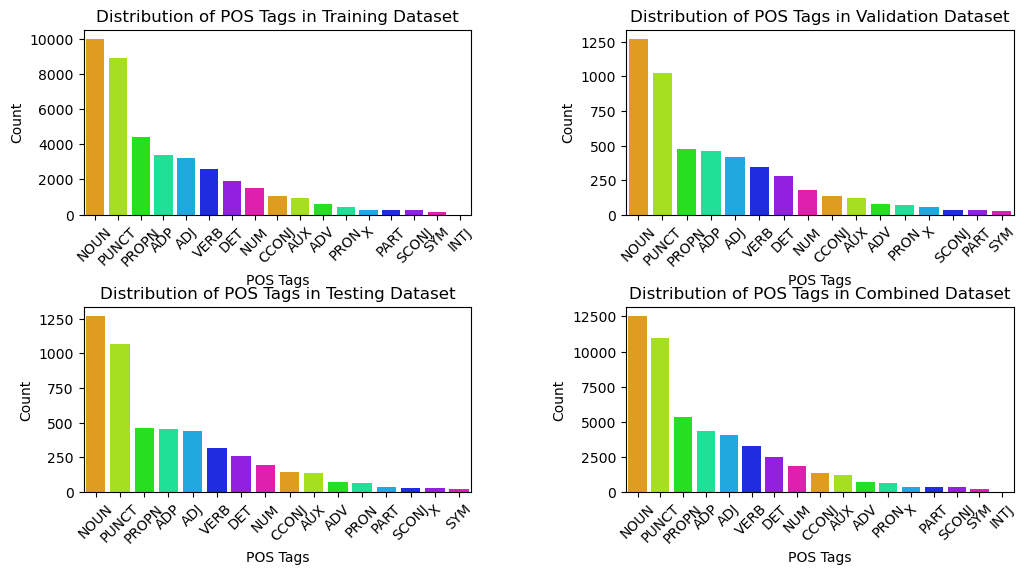

In [12]:
# Function to get POS tag counts
def get_pos_tag_counts(df):
    pos_tag_counts = {}
    for tags in df['pos_tags']:
        for tag in tags:
            pos_tag_counts[tag] = pos_tag_counts.get(tag, 0) + 1
    sorted_pos_tags = sorted(pos_tag_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_pos_tags

# Plotting function
def plot_pos_tag_distribution(ax, df, dataset_name, palette):
    sorted_pos_tags = get_pos_tag_counts(df)
    pos_tags = [tag[0] for tag in sorted_pos_tags]
    counts = [tag[1] for tag in sorted_pos_tags]
    sns.barplot(x=pos_tags, y=counts, ax=ax, palette=palette)
    ax.set_title(f'Distribution of POS Tags in {dataset_name} Dataset')
    ax.set_xlabel('POS Tags')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Plotting POS tag distribution for each dataset in its subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.5, wspace=0.4)
palette = sns.color_palette("hsv", 8)
plot_pos_tag_distribution(axs[0, 0], df_train, 'Training', palette)
plot_pos_tag_distribution(axs[0, 1], df_validation, 'Validation', palette)
plot_pos_tag_distribution(axs[1, 0], df_test, 'Testing', palette)
plot_pos_tag_distribution(axs[1, 1], df_combined, 'Combined', palette)
plt.show()

#### 1.2.8) Distribution of NER tags

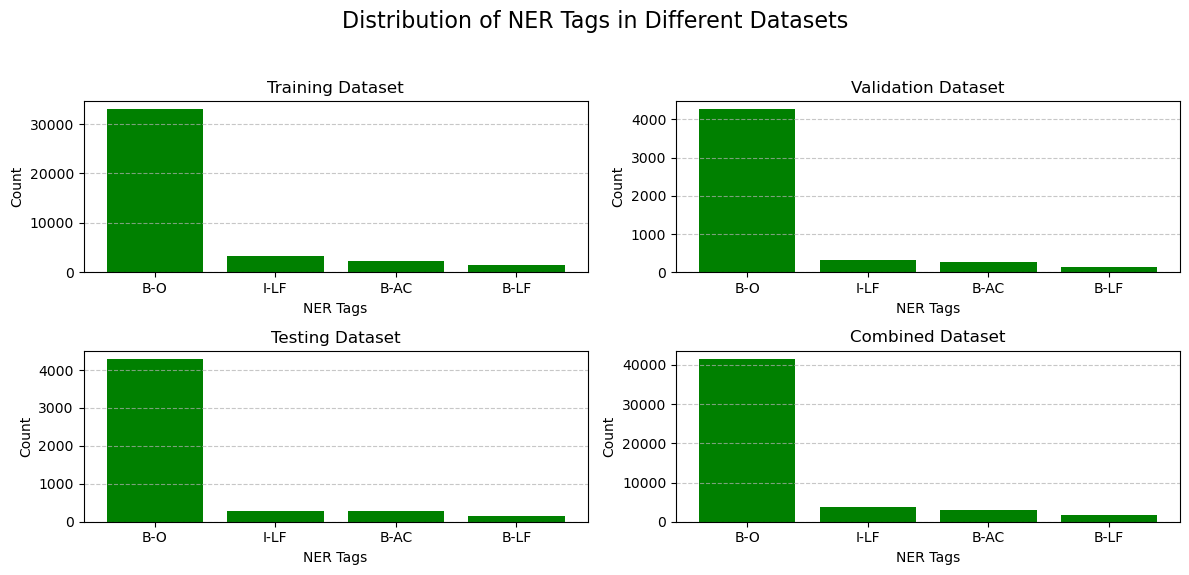

In [13]:
# Function to plot NER tag distribution as subplots
def plot_ner_tag_distribution_subplots(datasets):
    fig, axes = plt.subplots(2, 2, figsize=(12, 6))
    fig.suptitle('Distribution of NER Tags in Different Datasets', fontsize=16)
    for i, (df, dataset_name) in enumerate(datasets):
        ner_tag_counts = {}
        for tags in df['ner_tags']:
            for tag in tags:
                ner_tag_counts[tag] = ner_tag_counts.get(tag, 0) + 1
        sorted_ner_tags = sorted(ner_tag_counts.items(), key=lambda x: x[1], reverse=True)
        ner_tags = [tag[0] for tag in sorted_ner_tags]
        counts = [tag[1] for tag in sorted_ner_tags]
    # Plot the distribution of NER tags using a bar plot
        ax = axes[i // 2, i % 2]
        ax.bar(ner_tags, counts, color='green')
        ax.set_title(f'{dataset_name} Dataset')
        ax.set_xlabel('NER Tags')
        ax.set_ylabel('Count')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Creating a list of datasets and their names
datasets = [(df_train, 'Training'), (df_validation, 'Validation'), (df_test, 'Testing'), (df_combined, 'Combined')]

# Plotting NER tag distribution for each dataset as subplots
plot_ner_tag_distribution_subplots(datasets)

#### 1.2.9) Principal Component Analysis using Word Embedding

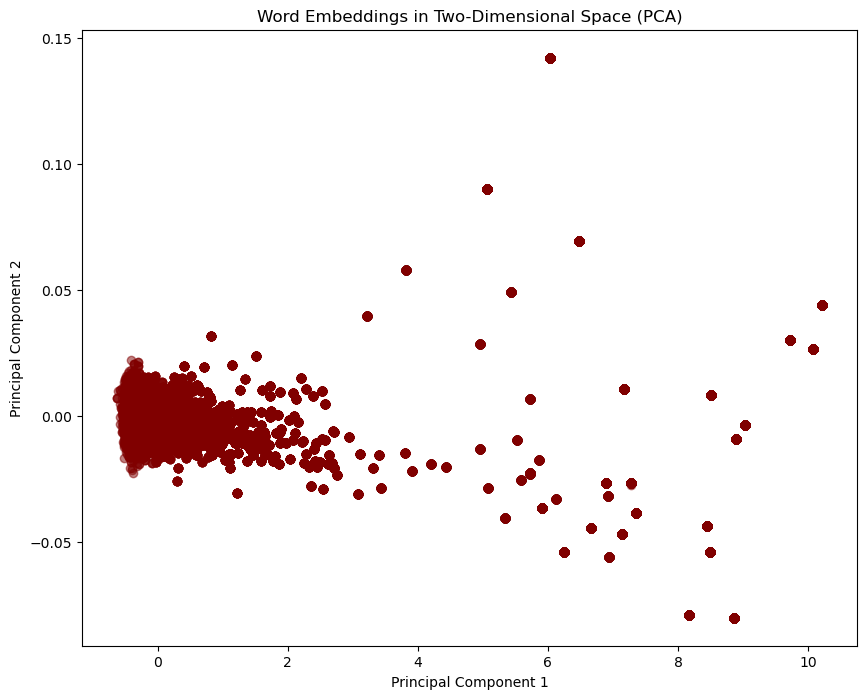

In [14]:
# Extracting data from the Arrow table for train, validation and test data
train_tokens = train_data["tokens"]
val_tokens = validation_data["tokens"]
test_tokens = test_data["tokens"]

# Converting all tokens in the list to lowercase
train_tokens = [str(token).lower() for token in train_tokens]
val_tokens = [str(token).lower() for token in val_tokens]
test_tokens = [str(token).lower() for token in test_tokens]

# Removing the double quotes and split each string into a list of tokens
train_tokens = [token[1:-1].split(", ") for token in train_tokens]
val_tokens = [token[1:-1].split(", ") for token in val_tokens]
test_tokens = [token[1:-1].split(", ") for token in test_tokens]

# Removing single quotes from each token within the inner lists
train_tokens = [[token.strip("'") for token in sentence] for sentence in train_tokens]
val_tokens = [[token.strip("'") for token in sentence] for sentence in val_tokens]
test_tokens = [[token.strip("'") for token in sentence] for sentence in test_tokens]

# Converting each list of tokens into a single string
train_documents = [' '.join(tokens) for tokens in train_tokens]
val_documents = [' '.join(tokens) for tokens in val_tokens]
test_documents = [' '.join(tokens) for tokens in test_tokens]
combined_documents = train_documents + val_documents + test_documents

# buildinging a corpus
corpus = combined_documents
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Training Word2Vec model on combined corpus
word2vec_model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# dataset for word embedding: train_document
dataset = train_documents

# Tokenizing and obtaining word embeddings for words in the dataset
word_embeddings_dataset = []
for sentence in dataset:
    tokens = word_tokenize(sentence.lower())
    embeddings = []
    for token in tokens:
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])
        else:
            embeddings.append([0] * word2vec_model.vector_size)
    word_embeddings_dataset.append(embeddings)
    
max_length = 323

# Padding and reshaping for PCA
padded_embeddings_dataset = pad_sequences(word_embeddings_dataset, dtype='float32', maxlen=max_length, padding='post', truncating='post')
word_embeddings_dataset_np = np.array(padded_embeddings_dataset)
n_sentences, max_sentence_length, embedding_dim = word_embeddings_dataset_np.shape
flattened_embeddings = word_embeddings_dataset_np.reshape(n_sentences * max_sentence_length, embedding_dim)

# Applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_embeddings)

# Plotting the transformed word embeddings in a 2-D space using a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, c='maroon')
plt.title('Word Embeddings in Two-Dimensional Space (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

<p>The plot represents the word embeddings transformed into a two-dimensional space using Principal Component Analysis (PCA). Each point on the plot corresponds to a word embedding from your dataset. PCA reduces the dimensionality of the word embeddings while preserving the most important information, allowing you to visualize them in a lower-dimensional space.</p><br>

In the scatter plot:<br>

* The x-axis represents the first principal component, which captures the most variance in the data.
* The y-axis represents the second principal component, which captures the second most variance orthogonal to the first component.
* Points that are closer together in the plot represent word embeddings that are similar in their high-dimensional space, while points that are farther apart represent word embeddings that are dissimilar. 
* This visualization helps to explore the relationships and clusters among word embeddings in your dataset.

#### 1.2.10) Conclusion
<p>From the Analysis of the PLOD-CW dataset provided, it can be inferred that the tokens, whose labels are to be predicted, is directly associated with the POS-tags, but the labels or NER-tags are not completely correlated to them. As a result of which, the following experimental setups are made with the consideration of only tokens and their NER-tags that are to be predicted.</p>

## 2) Experiments
### 2.1) Comparison between RNN and CNN using Spacy with PCA
<p>  In this experiment, I am implementing Spacy Tokenizer for the tokens and PCA for the ner tags for keeping in check the dimensions. With this preprocessing done, I am then implementing RNN and CNN with both Adam and SGD optimizers and comparing the results.</p><br>

#### 2.1.1) Extracting tokens and ner_tags

In [15]:
# Extracting data from the table for train, validation and test data [only tokens and ner tags]
train_tokens = train_data["tokens"]
val_tokens = validation_data["tokens"]
test_tokens = test_data["tokens"]
train_ner = train_data["ner_tags"]
val_ner = validation_data["ner_tags"]
test_ner = test_data["ner_tags"]

# Converting all tokens in the list to lowercase
train_tokens = [str(token).lower() for token in train_tokens]
val_tokens = [str(token).lower() for token in val_tokens]
test_tokens = [str(token).lower() for token in test_tokens]
train_ner = [str(token).lower() for token in train_ner]
val_ner = [str(token).lower() for token in val_ner]
test_ner = [str(token).lower() for token in test_ner]

# Removing the double quotes and split each string into a list of tokens
train_tokens = [token[1:-1].split(", ") for token in train_tokens]
val_tokens = [token[1:-1].split(", ") for token in val_tokens]
test_tokens = [token[1:-1].split(", ") for token in test_tokens]
train_ner = [token[1:-1].split(", ") for token in train_ner]
val_ner = [token[1:-1].split(", ") for token in val_ner]
test_ner = [token[1:-1].split(", ") for token in test_ner]

# Removing single quotes from each token within the inner lists
train_tokens = [[token.strip("'") for token in sentence] for sentence in train_tokens]
val_tokens = [[token.strip("'") for token in sentence] for sentence in val_tokens]
test_tokens = [[token.strip("'") for token in sentence] for sentence in test_tokens]
train_tokens = [[token.strip("'") for token in sentence] for sentence in train_ner]
val_tokens = [[token.strip("'") for token in sentence] for sentence in val_ner]
test_tokens = [[token.strip("'") for token in sentence] for sentence in test_ner]

# Converting each list of tokens into a single string
train_documents = [' '.join(tokens) for tokens in train_tokens]
val_documents = [' '.join(tokens) for tokens in val_tokens]
test_documents = [' '.join(tokens) for tokens in test_tokens]
train_ner_documents = [' '.join(tokens) for tokens in train_ner]
val_ner_documents = [' '.join(tokens) for tokens in val_ner]
test_ner_documents = [' '.join(tokens) for tokens in test_ner]

#### 2.1.2) Implementing Spacy with PCA for dimentionality reduction

In [16]:
# Loading SpaCy English model with word vectors
spacy = spacy.load("en_core_web_sm")

# Function to get word embeddings for a sentence
def get_word_embeddings(sentence):
    doc = spacy(sentence)
    return [token.vector for token in doc]

# Tokenizing the tokens and ner_tags
train_embeddings = [get_word_embeddings(sentence) for sentence in train_documents]
val_embeddings = [get_word_embeddings(sentence) for sentence in val_documents]
test_embeddings = [get_word_embeddings(sentence) for sentence in test_documents]
train_ner_embeddings = [get_word_embeddings(sentence) for sentence in train_ner_documents]
val_ner_embeddings = [get_word_embeddings(sentence) for sentence in val_ner_documents]
test_ner_embeddings = [get_word_embeddings(sentence) for sentence in test_ner_documents]

# Calculating the maximum number of components based on the input data
max_components = 323
n_components = 2

# Applying PCA to reduce dimensionality
pca = PCA(n_components=n_components, svd_solver='full')
train_embeddings_pca = [pca.fit_transform(sentence) for sentence in train_embeddings]
val_embeddings_pca = [pca.transform(sentence) for sentence in val_embeddings]
test_embeddings_pca = [pca.transform(sentence) for sentence in test_embeddings]
train_ner_embeddings_pca = [pca.fit_transform(sentence) for sentence in train_ner_embeddings]
val_ner_embeddings_pca = [pca.transform(sentence) for sentence in val_ner_embeddings]
test_ner_embeddings_pca = [pca.transform(sentence) for sentence in test_ner_embeddings]

C:\ProgramData\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


#### 2.1.3) Applying pad sequence

In [17]:
max_sequence_length = 50

# Padding the sequences
train_embeddings_pca_padded = pad_sequences(train_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
val_embeddings_pca_padded = pad_sequences(val_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
test_embeddings_pca_padded = pad_sequences(test_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
train_ner_embeddings_pca_padded = pad_sequences(train_ner_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
val_ner_embeddings_pca_padded = pad_sequences(val_ner_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
test_ner_embeddings_pca_padded = pad_sequences(test_ner_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')

# Convertting the padded sequences to numpy arrays
train_embeddings_pca_array = np.array(train_embeddings_pca_padded)
val_embeddings_pca_array = np.array(val_embeddings_pca_padded)
test_embeddings_pca_array = np.array(test_embeddings_pca_padded)
train_ner_embeddings_pca_array = np.array(train_ner_embeddings_pca_padded)
val_ner_embeddings_pca_array = np.array(val_ner_embeddings_pca_padded)
test_ner_embeddings_pca_array = np.array(test_ner_embeddings_pca_padded)

# Verifying the shape of the arrays
print("train_embeddings_pca_array.shape = ", train_embeddings_pca_array.shape)
print("val_embeddings_pca_array.shape = ", val_embeddings_pca_array.shape)
print("test_embeddings_pca_array.shape = ", test_embeddings_pca_array.shape)
print("train_ner_embeddings_pca_array.shape = ", train_ner_embeddings_pca_array.shape)
print("val_ner_embeddings_pca_array.shape = ", val_ner_embeddings_pca_array.shape)
print("test_ner_embeddings_pca_array.shape = ", test_ner_embeddings_pca_array.shape)

train_embeddings_pca_array.shape =  (1072, 50, 2)
val_embeddings_pca_array.shape =  (126, 50, 2)
test_embeddings_pca_array.shape =  (153, 50, 2)
train_ner_embeddings_pca_array.shape =  (1072, 50, 2)
val_ner_embeddings_pca_array.shape =  (126, 50, 2)
test_ner_embeddings_pca_array.shape =  (153, 50, 2)


#### 2.1.4) Implementing RNN with Adam optimizer

In [18]:
# Defining the RNN model architecture for this experiment
class RNNModel(Model):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn_layer = layers.SimpleRNN(units=64, return_sequences=True)
        self.dense_layer = layers.Dense(2, activation='softmax')

    def call(self, inputs):
        x = self.rnn_layer(inputs)
        x = self.dense_layer(x)
        return x

# Instantiating the RNN model
rnn_model_1 = RNNModel()

# Compiling the model
rnn_model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_1 = rnn_model_1.fit(x=train_embeddings_pca_array, y=train_ner_embeddings_pca_array, epochs=10, batch_size=16, validation_data=(val_embeddings_pca_array, val_ner_embeddings_pca_array))

# Evaluating the model
results_1 = rnn_model_1.evaluate(x=test_embeddings_pca_array, y=test_ner_embeddings_pca_array)
print("Test loss:", results_1[0])
print("Test accuracy:", results_1[1])

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5244 - loss: 0.2121 - val_accuracy: 0.5730 - val_loss: -1.5282
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5571 - loss: -7.2019 - val_accuracy: 0.7481 - val_loss: -22.8165
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7611 - loss: -25.0279 - val_accuracy: 0.9576 - val_loss: -38.5632
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9457 - loss: -37.6938 - val_accuracy: 0.9781 - val_loss: -50.9693
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9532 - loss: -49.4988 - val_accuracy: 0.9781 - val_loss: -61.3833
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9575 - loss: -59.5847 - val_accuracy: 0.9781 - val_loss: -70.9001
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9560 - loss: -68.0100 - val_accuracy: 0.9781 - val_loss: -80.1135
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9514 - loss: -75.7721 - val

#### 2.1.5) Predicting and decoding the encoded values for evaluation

In [19]:
# Converting one-hot encoded predictions back to labels
predicted_indices = np.argmax(rnn_model_1.predict(test_embeddings_pca_array), axis=2)
predicted_labels = [[test_ner[i][j] for j in predicted_indices[i]] for i in range(len(predicted_indices))]

# Similarly, converting one-hot encoded true labels back to labels
true_indices = np.argmax(test_ner_embeddings_pca_array, axis=2)
true_labels = [[test_ner[i][j] for j in true_indices[i]] for i in range(len(true_indices))]

# Flattening the lists of labels
flat_true_labels_1 = [label for sublist in true_labels for label in sublist]
flat_predicted_labels_1 = [label for sublist in predicted_labels for label in sublist]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


#### 2.1.6) Plotting confusion matrix and classification report

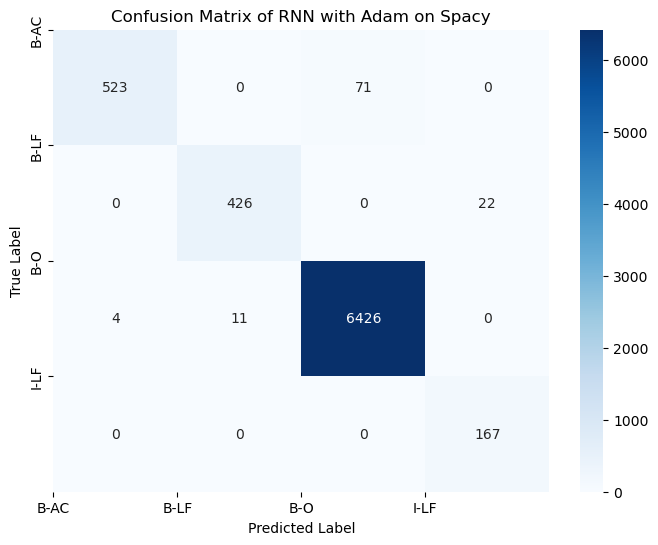

Classification Report of RNN with Adam on Spacy:
              precision    recall  f1-score   support

      'b-ac'       0.99      0.88      0.93       594
      'b-lf'       0.97      0.95      0.96       448
       'b-o'       0.99      1.00      0.99      6441
      'i-lf'       0.88      1.00      0.94       167

    accuracy                           0.99      7650
   macro avg       0.96      0.96      0.96      7650
weighted avg       0.99      0.99      0.99      7650



In [20]:
# Generating confusion matrix
conf_matrix_1 = confusion_matrix(flat_true_labels_1, flat_predicted_labels_1)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of RNN with Adam on Spacy')
labels = ['B-AC', 'B-LF', 'B-O', 'I-LF']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_1 = classification_report(flat_true_labels_1, flat_predicted_labels_1)
print("Classification Report of RNN with Adam on Spacy:")
print(class_report_1)

#### 2.1.7) Implementing RNN with rmsprop optimizer

In [21]:
# Instantiating the RNN model
rnn_model_2 = RNNModel()

# Changing the optimizer to RMSprop
rnn_model_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_2 = rnn_model_2.fit(x=train_embeddings_pca_array, y=train_ner_embeddings_pca_array, epochs=10, batch_size=16, validation_data=(val_embeddings_pca_array, val_ner_embeddings_pca_array))

# Evaluating the model
results_2 = rnn_model_2.evaluate(x=test_embeddings_pca_array, y=test_ner_embeddings_pca_array)
print("Test loss:", results_2[0])
print("Test accuracy:", results_2[1])

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5200 - loss: -0.3035 - val_accuracy: 0.5252 - val_loss: -7.9762
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5434 - loss: -9.4862 - val_accuracy: 0.6356 - val_loss: -19.1439
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5964 - loss: -19.3042 - val_accuracy: 0.6356 - val_loss: -30.5914
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6468 - loss: -29.7777 - val_accuracy: 0.9179 - val_loss: -40.7830
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9286 - loss: -39.5634 - val_accuracy: 0.9781 - val_loss: -49.5311
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9523 - loss: -46.9218 - val_accuracy: 0.9781 - val_loss: -57.6461
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9523 - loss: -54.2567 - val_accuracy: 0.9781 - val_loss: -65.2252
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9434 - loss: -59.1013 - val_

#### 2.1.7) Predicting and decoding the encoded values for evaluation

In [22]:
# Converting one-hot encoded predictions back to labels
predicted_indices = np.argmax(rnn_model_2.predict(test_embeddings_pca_array), axis=2)
predicted_labels = [[test_ner[i][j] for j in predicted_indices[i]] for i in range(len(predicted_indices))]

# Similarly, converting one-hot encoded true labels back to labels
true_indices = np.argmax(test_ner_embeddings_pca_array, axis=2)
true_labels = [[test_ner[i][j] for j in true_indices[i]] for i in range(len(true_indices))]

# Flattening the lists of labels
flat_true_labels_2 = [label for sublist in true_labels for label in sublist]
flat_predicted_labels_2 = [label for sublist in predicted_labels for label in sublist]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


#### 2.1.8) Plotting confusion matix and classification report

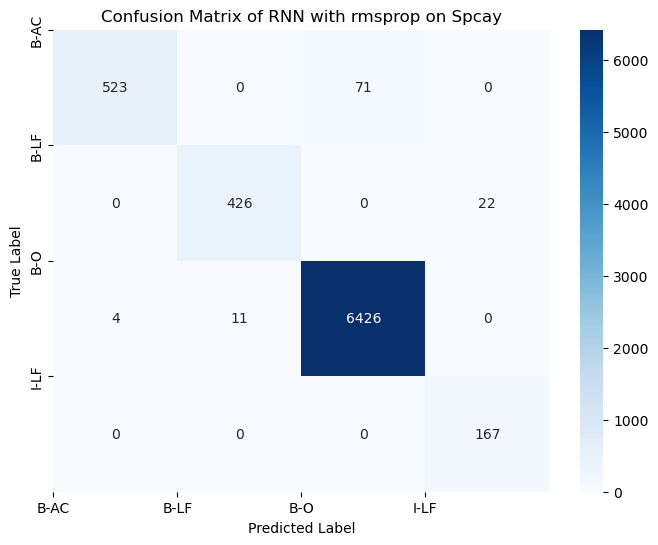

Classification Report of RNN with rmsprop on Spcay:
              precision    recall  f1-score   support

      'b-ac'       0.99      0.88      0.93       594
      'b-lf'       0.97      0.95      0.96       448
       'b-o'       0.99      1.00      0.99      6441
      'i-lf'       0.88      1.00      0.94       167

    accuracy                           0.99      7650
   macro avg       0.96      0.96      0.96      7650
weighted avg       0.99      0.99      0.99      7650



In [23]:
# Generate confusion matrix
conf_matrix_2 = confusion_matrix(flat_true_labels_2, flat_predicted_labels_2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of RNN with rmsprop on Spcay')
labels = ['B-AC', 'B-LF', 'B-O', 'I-LF']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generate classification report
class_report_2 = classification_report(flat_true_labels_2, flat_predicted_labels_2)
print("Classification Report of RNN with rmsprop on Spcay:")
print(class_report_2)

#### 2.1.9) Implementing CNN with Adam optimizer

In [24]:
class CNNModel(Model):
    def __init__(self, sequence_length):
        super(CNNModel, self).__init__()
        self.sequence_length = sequence_length
        self.conv1d_layer1 = layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')
        self.conv1d_layer2 = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')
        self.global_max_pooling = layers.GlobalMaxPooling1D()
        self.dense = layers.Dense(sequence_length * 2, activation='softmax')

    def call(self, inputs):
        x = self.conv1d_layer1(inputs)
        x = self.conv1d_layer2(x)
        x = self.global_max_pooling(x)
        x = self.dense(x)
        return tf.reshape(x, (-1, self.sequence_length, 2))

# Instantiating the CNN model
cnn_model_1 = CNNModel(sequence_length=50)

# Compile the model
cnn_model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model_1.fit(x=train_embeddings_pca_array, y=train_ner_embeddings_pca_array, epochs=10, batch_size=16, validation_data=(val_embeddings_pca_array, val_ner_embeddings_pca_array))

# Evaluate the model
results = cnn_model_1.evaluate(x=test_embeddings_pca_array, y=test_ner_embeddings_pca_array)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6032 - loss: -5.4483 - val_accuracy: 0.7540 - val_loss: -18.6953
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7426 - loss: -18.1476 - val_accuracy: 0.7540 - val_loss: -18.7513
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7445 - loss: -18.1978 - val_accuracy: 0.7540 - val_loss: -18.7499
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7462 - loss: -18.3244 - val_accuracy: 0.7540 - val_loss: -18.7513
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7427 - loss: -18.1228 - val_accuracy: 0.7540 - val_loss: -18.7489
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7461 - loss: -18.5363 - val_accuracy: 0.7540 - val_loss: -18.7413
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7407 - loss: -17.8339 - val_accuracy: 0.7540 - val_loss: -18.7476
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7454 - loss: -18.3586 - val

#### 2.1.10) Predicting and decoding the encoded values for evaluation

In [25]:
# Converting one-hot encoded predictions back to labels
predicted_indices = np.argmax(cnn_model_1.predict(test_embeddings_pca_array), axis=2)
predicted_labels = [[test_ner[i][j] for j in predicted_indices[i]] for i in range(len(predicted_indices))]

# Similarly, converting one-hot encoded true labels back to labels
true_indices = np.argmax(test_ner_embeddings_pca_array, axis=2)
true_labels = [[test_ner[i][j] for j in true_indices[i]] for i in range(len(true_indices))]

# Flattening the lists of labels
flat_true_labels_3 = [label for sublist in true_labels for label in sublist]
flat_predicted_labels_3 = [label for sublist in predicted_labels for label in sublist]

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000015C502D5440> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


#### 2.1.11) Plotting confusion matrix and classification report

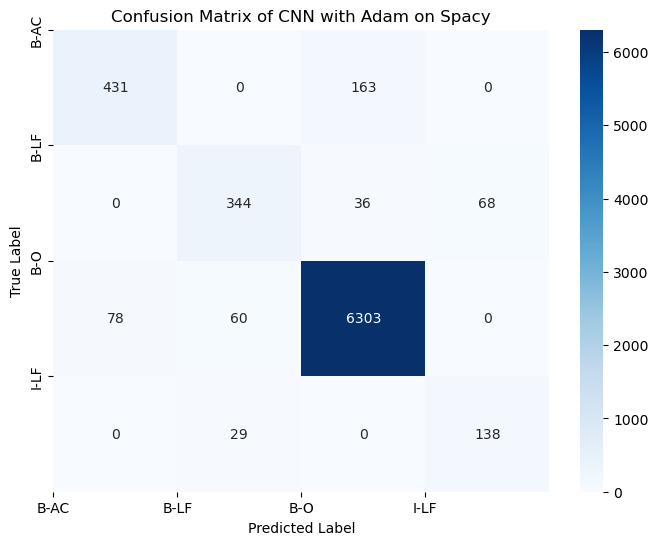

Classification Report of CNN with Adam on Spacy:
              precision    recall  f1-score   support

      'b-ac'       0.85      0.73      0.78       594
      'b-lf'       0.79      0.77      0.78       448
       'b-o'       0.97      0.98      0.97      6441
      'i-lf'       0.67      0.83      0.74       167

    accuracy                           0.94      7650
   macro avg       0.82      0.82      0.82      7650
weighted avg       0.94      0.94      0.94      7650



In [26]:
# Generating confusion matrix
conf_matrix_3 = confusion_matrix(flat_true_labels_3, flat_predicted_labels_3)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of CNN with Adam on Spacy')
labels = ['B-AC', 'B-LF', 'B-O', 'I-LF']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_3 = classification_report(flat_true_labels_3, flat_predicted_labels_3)
print("Classification Report of CNN with Adam on Spacy:")
print(class_report_3)

#### 2.1.12) Implementing CNN with SGD optimizer

In [27]:
# Instantiating the CNN model
cnn_model_2 = CNNModel(sequence_length=50)

# Compiling the model with optimizer changed to SGD
cnn_model_2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_2 = cnn_model_2.fit(x=train_embeddings_pca_array, y=train_ner_embeddings_pca_array, epochs=10, batch_size=16, validation_data=(val_embeddings_pca_array, val_ner_embeddings_pca_array))

# Evaluating the model
results_2 = cnn_model_2.evaluate(x=test_embeddings_pca_array, y=test_ner_embeddings_pca_array)
print("Test loss:", results_2[0])
print("Test accuracy:", results_2[1])

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6129 - loss: -3.8913 - val_accuracy: 0.8552 - val_loss: -18.7191
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8319 - loss: -18.0497 - val_accuracy: 0.8552 - val_loss: -18.7429
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8307 - loss: -18.0338 - val_accuracy: 0.8535 - val_loss: -18.7490
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8228 - loss: -17.7005 - val_accuracy: 0.8449 - val_loss: -18.7499
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8251 - loss: -18.3392 - val_accuracy: 0.8386 - val_loss: -18.7497
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8227 - loss: -18.1430 - val_accuracy: 0.8456 - val_loss: -18.7497
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8240 - loss: -18.0379 - val_accuracy: 0.8538 - val_loss: -18.7371
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8325 - loss: -18.2785 - val

#### 2.1.12) Predicting and decoding the encoded values for evaluation

In [28]:
# Converting one-hot encoded predictions back to labels
predicted_indices = np.argmax(cnn_model_2.predict(test_embeddings_pca_array), axis=2)
predicted_labels = [[test_ner[i][j] for j in predicted_indices[i]] for i in range(len(predicted_indices))]

# Similarly, converting one-hot encoded true labels back to labels
true_indices = np.argmax(test_ner_embeddings_pca_array, axis=2)
true_labels = [[test_ner[i][j] for j in true_indices[i]] for i in range(len(true_indices))]

# Flattening the lists of labels
flat_true_labels_4 = [label for sublist in true_labels for label in sublist]
flat_predicted_labels_4 = [label for sublist in predicted_labels for label in sublist]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


#### 2.1.13) Plotting confusion matrix and classification report

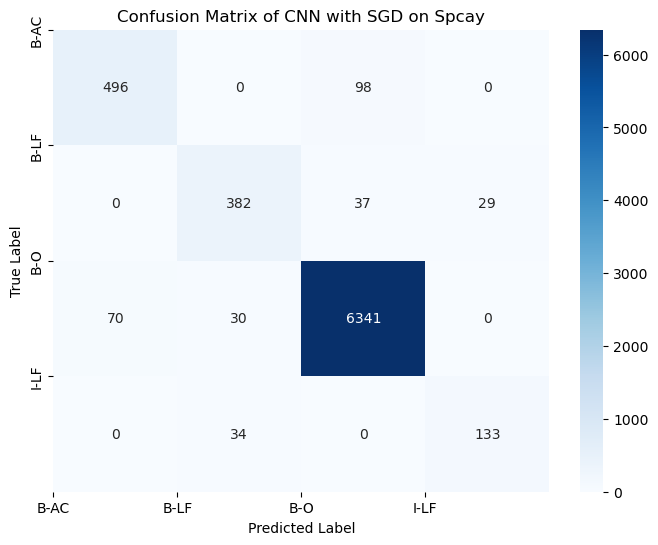

Classification Report of CNN with SGD on Spcay:
              precision    recall  f1-score   support

      'b-ac'       0.88      0.84      0.86       594
      'b-lf'       0.86      0.85      0.85       448
       'b-o'       0.98      0.98      0.98      6441
      'i-lf'       0.82      0.80      0.81       167

    accuracy                           0.96      7650
   macro avg       0.88      0.87      0.88      7650
weighted avg       0.96      0.96      0.96      7650



In [29]:
# Generating confusion matrix
conf_matrix_4 = confusion_matrix(flat_true_labels_4, flat_predicted_labels_4)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of CNN with SGD on Spcay')
labels = ['B-AC', 'B-LF', 'B-O', 'I-LF']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_4 = classification_report(flat_true_labels_4, flat_predicted_labels_4)
print("Classification Report of CNN with SGD on Spcay:")
print(class_report_4)

### 2.2) Comparison between RNN and CNN using Word Indexing technique
<p>  In this experiment, I am implementing Word Indexing Technique for tokens and Label Mapping for tokens and then preparing a flat dataset. With this preprocessing done, I am then implementing RNN and CNN with both Adam and SGD optimizers and comparing the results.</p><br>

#### 2.2.1) Extracting data and preprocessing

In [30]:
# Extracting data
train_tokens = train_data["tokens"]
val_tokens = validation_data["tokens"]
test_tokens = test_data["tokens"]
train_ner_tags = train_data["ner_tags"]
val_ner_tags = validation_data["ner_tags"]
test_ner_tags = test_data["ner_tags"]

# Converting all tokens in the list to lowercase
train_tokens = [str(token).lower() for token in train_tokens]
val_tokens = [str(token).lower() for token in val_tokens]
test_tokens = [str(token).lower() for token in test_tokens]

# Removing the double quotes and split each string into a list of tokens
train_tokens = [token[1:-1].split(", ") for token in train_tokens]
val_tokens = [token[1:-1].split(", ") for token in val_tokens]
test_tokens = [token[1:-1].split(", ") for token in test_tokens]

# Removing single quotes from each token within the inner lists
train_tokens = [[token.strip("'") for token in sentence] for sentence in train_tokens]
val_tokens = [[token.strip("'") for token in sentence] for sentence in val_tokens]
test_tokens = [[token.strip("'") for token in sentence] for sentence in test_tokens]

# Converting each list of tokens into a single string
train_documents = [' '.join(tokens) for tokens in train_tokens]
val_documents = [' '.join(tokens) for tokens in val_tokens]
test_documents = [' '.join(tokens) for tokens in test_tokens]

#### 2.2.2) Implementing Word Indexing and Label Mapping

In [31]:
# Defining the label mapping
label_mapping = {'B-O': 0, 'B-AC': 1, 'B-LF': 2, 'I-LF': 3}

# Converting NER tags to numerical labels using label mapping
train_ner_labels = [[label_mapping[tag] for tag in sentence_tags] for sentence_tags in train_ner_tags]
val_ner_labels = [[label_mapping[tag] for tag in sentence_tags] for sentence_tags in val_ner_tags]
test_ner_labels = [[label_mapping[tag] for tag in sentence_tags] for sentence_tags in test_ner_tags]

def encode_documents_no_padding(documents, word_to_ix=None):
    tokenized_docs = [doc.split() for doc in documents]
    
    if word_to_ix is None:
        word_to_ix = {"<UNK>": 0}
        for sentence in tokenized_docs:
            for word in sentence:
                if word not in word_to_ix:
                    word_to_ix[word] = len(word_to_ix)
    
    encoded_docs = []
    for sentence in tokenized_docs:
        encoded_sentence = [word_to_ix.get(word, word_to_ix["<UNK>"]) for word in sentence]
        encoded_docs.append(encoded_sentence)
        
    return encoded_docs, word_to_ix

train_encoded_no_pad, word_to_ix = encode_documents_no_padding(train_documents)
val_encoded_no_pad, _ = encode_documents_no_padding(val_documents, word_to_ix=word_to_ix)
test_encoded_no_pad, _ = encode_documents_no_padding(test_documents, word_to_ix=word_to_ix)

# Flattening encoded_no_pad
train_encoded_flat = [item for sublist in train_encoded_no_pad for item in sublist]
val_encoded_flat = [item for sublist in val_encoded_no_pad for item in sublist]
test_encoded_flat = [item for sublist in test_encoded_no_pad for item in sublist]

# Flattening ner_labels
train_ner_flat = [item for sublist in train_ner_labels for item in sublist]
val_ner_flat = [item for sublist in val_ner_labels for item in sublist]
test_ner_flat = [item for sublist in test_ner_labels for item in sublist]

# Converting lists to numpy arrays
train_encoded_flat_np = np.array(train_encoded_flat)
val_encoded_flat_np = np.array(val_encoded_flat)
test_encoded_flat_np = np.array(test_encoded_flat)
train_ner_flat_np = np.array(train_ner_flat)
val_ner_flat_np = np.array(val_ner_flat)
test_ner_flat_np = np.array(test_ner_flat)

# Reshaping input data to include timestep dimension
train_encoded_flat_np = np.expand_dims(train_encoded_flat_np, axis=-1)
val_encoded_flat_np = np.expand_dims(val_encoded_flat_np, axis=-1)
test_encoded_flat_np = np.expand_dims(test_encoded_flat_np, axis=-1)

#### 2.2.3) Implementing RNN with Adam optimizer

In [32]:
vocab_size = len(word_to_ix)
embedding_dim = 2

# Defining the model
rnn_model_3 = Sequential()
rnn_model_3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
rnn_model_3.add(SimpleRNN(units=128))  
rnn_model_3.add(Dense(units=len(label_mapping), activation='softmax'))

# Compiling the model
rnn_model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
rnn_model_3.fit(train_encoded_flat_np, train_ner_flat_np, epochs=10, batch_size=32, validation_data=(val_encoded_flat_np, val_ner_flat_np))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8202 - loss: 0.6699 - val_accuracy: 0.8560 - val_loss: 0.4538
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8407 - loss: 0.4455 - val_accuracy: 0.8582 - val_loss: 0.4501
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8681 - loss: 0.3637 - val_accuracy: 0.8682 - val_loss: 0.4661
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8845 - loss: 0.3174 - val_accuracy: 0.8688 - val_loss: 0.4792
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8993 - loss: 0.2737 - val_accuracy: 0.8688 - val_loss: 0.4797
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9028 - loss: 0.2562 - val_accuracy: 0.8690 - val_loss: 0.4669
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9060 - loss: 0.2424 - val_accuracy: 0.8698 - val_loss: 0.4756
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9078 - loss: 0.2358 - 

#### 2.2.4) Make predictions and evaluate RNN with Adam optimizer

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


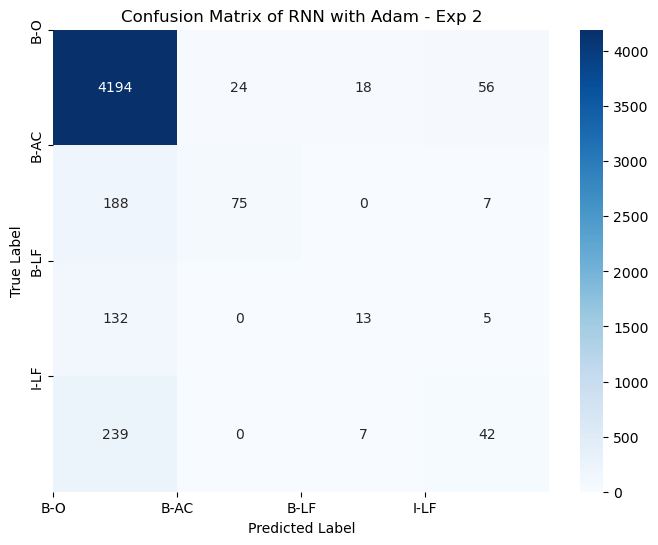


Classification Report of RNN with Adam - Exp 2:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4292
           1       0.76      0.28      0.41       270
           2       0.34      0.09      0.14       150
           3       0.38      0.15      0.21       288

    accuracy                           0.86      5000
   macro avg       0.59      0.37      0.42      5000
weighted avg       0.83      0.86      0.83      5000



In [33]:
# Making predictions on the test data
predictions = rnn_model_3.predict(test_encoded_flat_np)

# Converting predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generating and plotting confusion matrix
conf_matrix_5 = confusion_matrix(test_ner_flat_np, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_5, annot=True, fmt='d', cmap='Blues')
labels = {'B-O': 0, 'B-AC': 1, 'B-LF': 2, 'I-LF': 3}
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of RNN with Adam - Exp 2')
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_5 = classification_report(test_ner_flat_np, predicted_labels)
print("\nClassification Report of RNN with Adam - Exp 2:")
print(class_report_5)

#### 2.2.5) Implementing RNN with SGD optimizer

In [34]:
# Defining the model
rnn_model_4 = Sequential()
rnn_model_4.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
rnn_model_4.add(SimpleRNN(units=128))  
rnn_model_4.add(Dense(units=len(label_mapping), activation='softmax'))

# Compiling the model
rnn_model_4.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
rnn_model_4.fit(train_encoded_flat_np, train_ner_flat_np, epochs=10, batch_size=32, validation_data=(val_encoded_flat_np, val_ner_flat_np))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8220 - loss: 0.7686 - val_accuracy: 0.8522 - val_loss: 0.5821
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8224 - loss: 0.6529 - val_accuracy: 0.8522 - val_loss: 0.5792
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8247 - loss: 0.6455 - val_accuracy: 0.8522 - val_loss: 0.5772
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8247 - loss: 0.6404 - val_accuracy: 0.8522 - val_loss: 0.5691
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8242 - loss: 0.6303 - val_accuracy: 0.8522 - val_loss: 0.5567
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8261 - loss: 0.6097 - val_accuracy: 0.8522 - val_loss: 0.5430
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8241 - loss: 0.5980 - val_accuracy: 0.8522 - val_loss: 0.5315
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8247 - loss: 0.5880 - 

#### 2.2.6) Make predictions and evaluate RNN with SGD optimizer

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


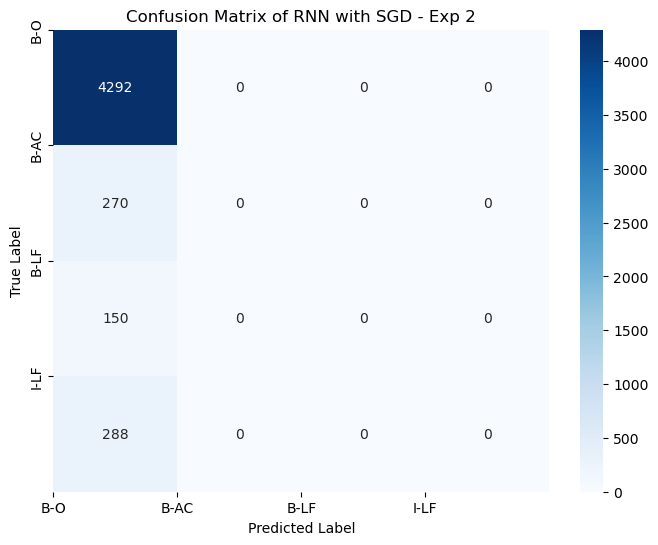


Classification Report of RNN with SGD - Exp 2:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4292
           1       0.00      0.00      0.00       270
           2       0.00      0.00      0.00       150
           3       0.00      0.00      0.00       288

    accuracy                           0.86      5000
   macro avg       0.21      0.25      0.23      5000
weighted avg       0.74      0.86      0.79      5000



C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [35]:
# Making predictions on the test data
predictions = rnn_model_4.predict(test_encoded_flat_np)

# Converting predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generating confusion matrix
conf_matrix_6 = confusion_matrix(test_ner_flat_np, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_6, annot=True, fmt='d', cmap='Blues')
labels = {'B-O': 0, 'B-AC': 1, 'B-LF': 2, 'I-LF': 3}
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of RNN with SGD - Exp 2')
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_6 = classification_report(test_ner_flat_np, predicted_labels)
print("\nClassification Report of RNN with SGD - Exp 2:")
print(class_report_6)

#### 2.2.7) Implementing CNN with Adam optimizer

In [36]:
vocab_size = len(word_to_ix)
embedding_dim = 2

# Defining the model
cnn_model_3 = Sequential()
cnn_model_3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
cnn_model_3.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model_3.add(GlobalMaxPooling1D())
cnn_model_3.add(Dense(units=len(label_mapping), activation='softmax'))

# Compiling the model
cnn_model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
cnn_model_3.fit(train_encoded_flat_np, train_ner_flat_np, epochs=10, batch_size=32, validation_data=(val_encoded_flat_np, val_ner_flat_np))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8202 - loss: 0.7366 - val_accuracy: 0.8526 - val_loss: 0.4642
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8363 - loss: 0.4530 - val_accuracy: 0.8576 - val_loss: 0.4496
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8656 - loss: 0.3726 - val_accuracy: 0.8650 - val_loss: 0.4626
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8771 - loss: 0.3314 - val_accuracy: 0.8650 - val_loss: 0.4809
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8800 - loss: 0.3114 - val_accuracy: 0.8628 - val_loss: 0.4861
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8895 - loss: 0.2915 - val_accuracy: 0.8658 - val_loss: 0.4810
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9006 - loss: 0.2685 - val_accuracy: 0.8670 - val_loss: 0.4674
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9026 - loss: 0.2526 - 

#### 2.2.8) Make predictions and evaluate CNN with Adam optimizer

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


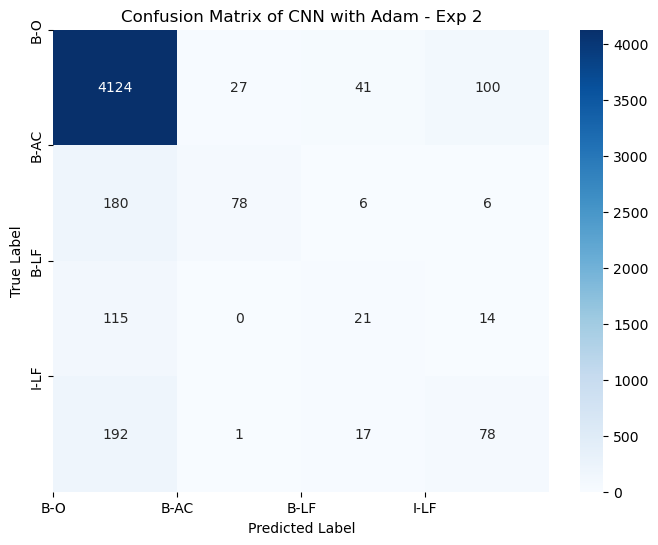


Classification Report of CNN with Adam - Exp 2:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      4292
           1       0.74      0.29      0.41       270
           2       0.25      0.14      0.18       150
           3       0.39      0.27      0.32       288

    accuracy                           0.86      5000
   macro avg       0.57      0.42      0.46      5000
weighted avg       0.84      0.86      0.84      5000



In [37]:
# Making predictions on the test data
predictions = cnn_model_3.predict(test_encoded_flat_np)

# Converting predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generating and plotting confusion matrix
conf_matrix_7 = confusion_matrix(test_ner_flat_np, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_7, annot=True, fmt='d', cmap='Blues')
labels = {'B-O': 0, 'B-AC': 1, 'B-LF': 2, 'I-LF': 3}
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of CNN with Adam - Exp 2')
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_7 = classification_report(test_ner_flat_np, predicted_labels)
print("\nClassification Report of CNN with Adam - Exp 2:")
print(class_report_7)

#### 2.2.9) Implementing CNN with SGD optimizer

In [38]:
vocab_size = len(word_to_ix)
embedding_dim = 2

# Defining the model
cnn_model_4 = Sequential()
cnn_model_4.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
cnn_model_4.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model_4.add(GlobalMaxPooling1D())
cnn_model_4.add(Dense(units=len(label_mapping), activation='softmax'))

# Compiling the model
cnn_model_4.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
cnn_model_4.fit(train_encoded_flat_np, train_ner_flat_np, epochs=10, batch_size=32, validation_data=(val_encoded_flat_np, val_ner_flat_np))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8219 - loss: 0.7976 - val_accuracy: 0.8522 - val_loss: 0.5794
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8224 - loss: 0.6503 - val_accuracy: 0.8522 - val_loss: 0.5762
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8259 - loss: 0.6350 - val_accuracy: 0.8522 - val_loss: 0.5699
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8245 - loss: 0.6293 - val_accuracy: 0.8522 - val_loss: 0.5588
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8228 - loss: 0.6194 - val_accuracy: 0.8522 - val_loss: 0.5464
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8228 - loss: 0.6043 - val_accuracy: 0.8522 - val_loss: 0.5347
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8225 - loss: 0.5908 - val_accuracy: 0.8522 - val_loss: 0.5269
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8259 - loss: 0.5714 - 

#### 2.2.10) Make predictions and evaluate CNN with SGD optimizer

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


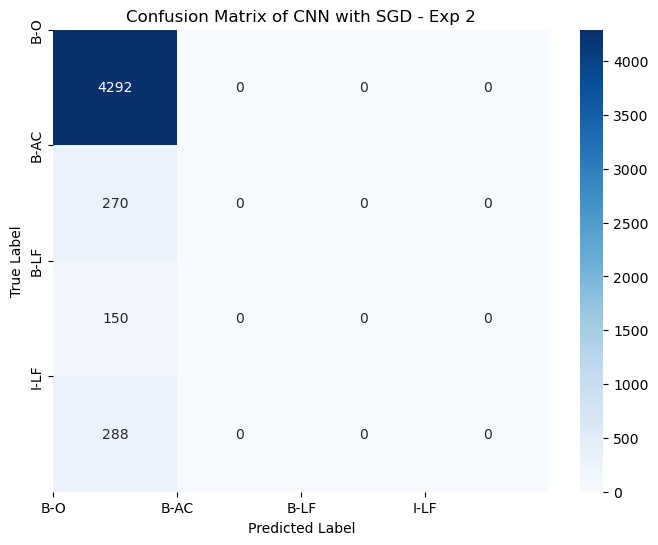


Classification Report of CNN with SGD - Exp 2:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4292
           1       0.00      0.00      0.00       270
           2       0.00      0.00      0.00       150
           3       0.00      0.00      0.00       288

    accuracy                           0.86      5000
   macro avg       0.21      0.25      0.23      5000
weighted avg       0.74      0.86      0.79      5000



C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [39]:
# Making predictions on the test data
predictions = cnn_model_4.predict(test_encoded_flat_np)

# Converting predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generating and plotting confusion matrix
conf_matrix_8 = confusion_matrix(test_ner_flat_np, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_8, annot=True, fmt='d', cmap='Blues')
labels = {'B-O': 0, 'B-AC': 1, 'B-LF': 2, 'I-LF': 3}
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of CNN with SGD - Exp 2')
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_8 = classification_report(test_ner_flat_np, predicted_labels)
print("\nClassification Report of CNN with SGD - Exp 2:")
print(class_report_8)

### 2.3) Comparison between Word2Vec and GloVe on CNN
#### 2.3.1) Extracting tokens and ner_tags

In [41]:
# Loading the dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")

# Extacting data
train_data = dataset["train"]
validation_data = dataset["validation"]
test_data = dataset["test"]

# getting tokens and ner_tags
train_tokens = train_data["tokens"]
val_tokens = validation_data["tokens"]
test_tokens = test_data["tokens"]
train_ner = train_data["ner_tags"]
val_ner = validation_data["ner_tags"]
test_ner = test_data["ner_tags"]

# Converting all tokens in the list to lowercase
train_ner = [str(token).lower() for token in train_ner]
val_ner = [str(token).lower() for token in val_ner]
test_ner = [str(token).lower() for token in test_ner]

# Removing the double quotes and split each string into a list of tokens
train_ner = [token[1:-1].split(", ") for token in train_ner]
val_ner = [token[1:-1].split(", ") for token in val_ner]
test_ner = [token[1:-1].split(", ") for token in test_ner]

# Converting each list of tokens into a single string
train_ner_documents = [' '.join(tokens) for tokens in train_ner]
val_ner_documents = [' '.join(tokens) for tokens in val_ner]
test_ner_documents = [' '.join(tokens) for tokens in test_ner]

# Removing single quotes from each token within the inner lists
train_tokens = [[token.strip("'") for token in sentence] for sentence in train_ner]
val_tokens = [[token.strip("'") for token in sentence] for sentence in val_ner]
test_tokens = [[token.strip("'") for token in sentence] for sentence in test_ner]

# Converting each list of tokens into a single string
train_documents = [' '.join(tokens) for tokens in train_tokens]
val_documents = [' '.join(tokens) for tokens in val_tokens]
test_documents = [' '.join(tokens) for tokens in test_tokens]
combined_documents = train_documents + val_documents + test_documents

Found cached dataset parquet (C:/Users/user/.cache/huggingface/datasets/surrey-nlp___parquet/surrey-nlp--PLOD-CW-843ef47e3e665cc1/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/3 [00:00<?, ?it/s]

#### 2.3.2) Implementing Word2Vec

In [42]:
# building a corpus
corpus = combined_documents
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Training Word2Vec model with vector size 2
word2vec_model = Word2Vec(tokenized_corpus, vector_size=2, window=5, min_count=1, workers=4)

# function to get word embeddings for a sentence using Word2Vec
def get_word_embeddings(sentence, word2vec_model):
    embeddings = []
    for word in word_tokenize(sentence.lower()):
        if word in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[word])
        else:
            embeddings.append(np.zeros(word2vec_model.vector_size))
    return embeddings

# Tokenizing the tokens
train_embeddings = [get_word_embeddings(sentence, word2vec_model) for sentence in train_documents]
val_embeddings = [get_word_embeddings(sentence, word2vec_model) for sentence in val_documents]
test_embeddings = [get_word_embeddings(sentence, word2vec_model) for sentence in test_documents]

#### 2.3.3) Using PCA for dimensionality reduction 

In [43]:
max_components = 323
n_components = 2

# Applying PCA to reduce dimensionality
pca = PCA(n_components=n_components, svd_solver='full')
train_embeddings_pca = [pca.fit_transform(sentence) for sentence in train_embeddings]
val_embeddings_pca = [pca.transform(sentence) for sentence in val_embeddings]
test_embeddings_pca = [pca.transform(sentence) for sentence in test_embeddings]

# Tokenizing the tokens
train_ner_embeddings = [get_word_embeddings(sentence, word2vec_model) for sentence in train_ner_documents]
val_ner_embeddings = [get_word_embeddings(sentence, word2vec_model) for sentence in val_ner_documents]
test_ner_embeddings = [get_word_embeddings(sentence, word2vec_model) for sentence in test_ner_documents]

# Applying PCA to reduce dimensionality
train_ner_embeddings_pca = [pca.fit_transform(sentence) for sentence in train_ner_embeddings]
val_ner_embeddings_pca = [pca.transform(sentence) for sentence in val_ner_embeddings]
test_ner_embeddings_pca = [pca.transform(sentence) for sentence in test_ner_embeddings]

# Defining the maximum sequence length
max_sequence_length = 50

# Pading the sequences
train_embeddings_pca_padded = pad_sequences(train_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
val_embeddings_pca_padded = pad_sequences(val_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
test_embeddings_pca_padded = pad_sequences(test_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
train_ner_embeddings_pca_padded = pad_sequences(train_ner_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
val_ner_embeddings_pca_padded = pad_sequences(val_ner_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
test_ner_embeddings_pca_padded = pad_sequences(test_ner_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')

# Converting the padded sequences to numpy arrays
train_embeddings_pca_array = np.array(train_embeddings_pca_padded)
val_embeddings_pca_array = np.array(val_embeddings_pca_padded)
test_embeddings_pca_array = np.array(test_embeddings_pca_padded)
train_ner_embeddings_pca_array = np.array(train_ner_embeddings_pca_padded)
val_ner_embeddings_pca_array = np.array(val_ner_embeddings_pca_padded)
test_ner_embeddings_pca_array = np.array(test_ner_embeddings_pca_padded)

# Verifying the shape of the arrays
print("train_embeddings_pca_array.shape = ", train_embeddings_pca_array.shape)
print("val_embeddings_pca_array.shape = ", val_embeddings_pca_array.shape)
print("test_embeddings_pca_array.shape = ", test_embeddings_pca_array.shape)
print("train_ner_embeddings_pca_array.shape = ", train_ner_embeddings_pca_array.shape)
print("val_ner_embeddings_pca_array.shape =", val_ner_embeddings_pca_array.shape)
print("test_ner_embeddings_pca_array.shape =", test_ner_embeddings_pca_array.shape)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

train_embeddings_pca_array.shape =  (1072, 50, 2)
val_embeddings_pca_array.shape =  (126, 50, 2)
test_embeddings_pca_array.shape =  (153, 50, 2)
train_ner_embeddings_pca_array.shape =  (1072, 50, 2)
val_ner_embeddings_pca_array.shape = (126, 50, 2)
test_ner_embeddings_pca_array.shape = (153, 50, 2)


#### 2.3.4) Implementing CNN with Adam optimizer

In [44]:
class CNNModel(Model):
    def __init__(self, sequence_length):
        super(CNNModel, self).__init__()
        self.sequence_length = sequence_length
        self.conv1d_layer1 = layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')
        self.conv1d_layer2 = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')
        self.global_max_pooling = layers.GlobalMaxPooling1D()
        self.dense = layers.Dense(sequence_length * 2, activation='softmax')

    def call(self, inputs):
        x = self.conv1d_layer1(inputs)
        x = self.conv1d_layer2(x)
        x = self.global_max_pooling(x)
        x = self.dense(x)
        return tf.reshape(x, (-1, self.sequence_length, 2))

# Instantiating the CNN model
cnn_model_5 = CNNModel(sequence_length=50)

# Compiling the model
cnn_model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = cnn_model_5.fit(x=train_embeddings_pca_array, y=train_ner_embeddings_pca_array, epochs=10, batch_size=16, validation_data=(val_embeddings_pca_array, val_ner_embeddings_pca_array))

# Evaluating the model
results = cnn_model_5.evaluate(x=test_embeddings_pca_array, y=test_ner_embeddings_pca_array)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6386 - loss: -0.1733 - val_accuracy: 0.0257 - val_loss: 0.1512
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7317 - loss: -1.3688 - val_accuracy: 0.0292 - val_loss: 0.1507
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7375 - loss: -1.5765 - val_accuracy: 0.0465 - val_loss: 0.1646
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7525 - loss: -1.7139 - val_accuracy: 0.0865 - val_loss: 0.0019
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7671 - loss: -1.8142 - val_accuracy: 0.1025 - val_loss: -0.1358
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8073 - loss: -1.9756 - val_accuracy: 0.1043 - val_loss: -0.2533
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8120 - loss: -1.9873 - val_accuracy: 0.1043 - val_loss: -0.1898
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7935 - loss: -2.0600 - val_accuracy: 0.1043 

#### 2.3.5) Plotting Classification Report and Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


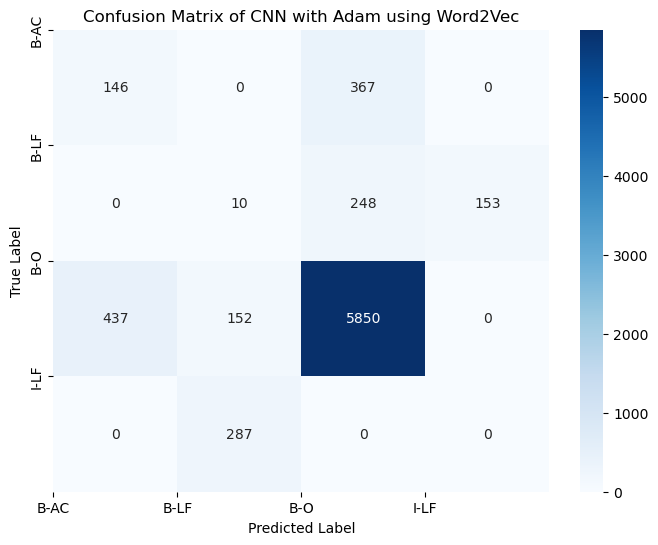

Classification Report of CNN with Adam using Word2Vec:
              precision    recall  f1-score   support

      'b-ac'       0.25      0.28      0.27       513
      'b-lf'       0.02      0.02      0.02       411
       'b-o'       0.90      0.91      0.91      6439
      'i-lf'       0.00      0.00      0.00       287

    accuracy                           0.79      7650
   macro avg       0.29      0.30      0.30      7650
weighted avg       0.78      0.79      0.78      7650



In [45]:
# Converting one-hot encoded predictions back to labels
predicted_indices = np.argmax(cnn_model_5.predict(test_embeddings_pca_array), axis=2)
predicted_labels = [[test_ner[i][j] for j in predicted_indices[i]] for i in range(len(predicted_indices))]

# Similarly, converting one-hot encoded true labels back to labels
true_indices = np.argmax(test_ner_embeddings_pca_array, axis=2)
true_labels = [[test_ner[i][j] for j in true_indices[i]] for i in range(len(true_indices))]

# Flattening the lists of labels
flat_true_labels_3 = [label for sublist in true_labels for label in sublist]
flat_predicted_labels_3 = [label for sublist in predicted_labels for label in sublist]

# Generating and plotting confusion matrix
conf_matrix_9 = confusion_matrix(flat_true_labels_3, flat_predicted_labels_3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_9, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of CNN with Adam using Word2Vec')
labels = ['B-AC', 'B-LF', 'B-O', 'I-LF']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_9 = classification_report(flat_true_labels_3, flat_predicted_labels_3)
print("Classification Report of CNN with Adam using Word2Vec:")
print(class_report_9)

#### 2.3.6) Implementing CNN with SGD optimizer

In [46]:
# Instantiating the CNN model
cnn_model_6 = CNNModel(sequence_length=50)

# Compiling the model with optimizer changed to SGD
cnn_model_6.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_2 = cnn_model_6.fit(x=train_embeddings_pca_array, y=train_ner_embeddings_pca_array, epochs=10, batch_size=16, validation_data=(val_embeddings_pca_array, val_ner_embeddings_pca_array))

# Evaluating the model
results_2 = cnn_model_6.evaluate(x=test_embeddings_pca_array, y=test_ner_embeddings_pca_array)
print("Test loss:", results_2[0])
print("Test accuracy:", results_2[1])

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4252 - loss: 0.0977 - val_accuracy: 0.5230 - val_loss: -0.6946
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4541 - loss: 0.0943 - val_accuracy: 0.4873 - val_loss: -0.6883
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4722 - loss: 0.0619 - val_accuracy: 0.4630 - val_loss: -0.6827
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4926 - loss: 0.0555 - val_accuracy: 0.4406 - val_loss: -0.6775
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5224 - loss: 0.0530 - val_accuracy: 0.4187 - val_loss: -0.6725
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5418 - loss: 0.0452 - val_accuracy: 0.3960 - val_loss: -0.6674
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5661 - loss: 0.0206 - val_accuracy: 0.3663 - val_loss: -0.6619
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5869 - loss: 0.0155 - val_accuracy: 0.3202 - v

#### 2.3.7) Plotting Classification Report and Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


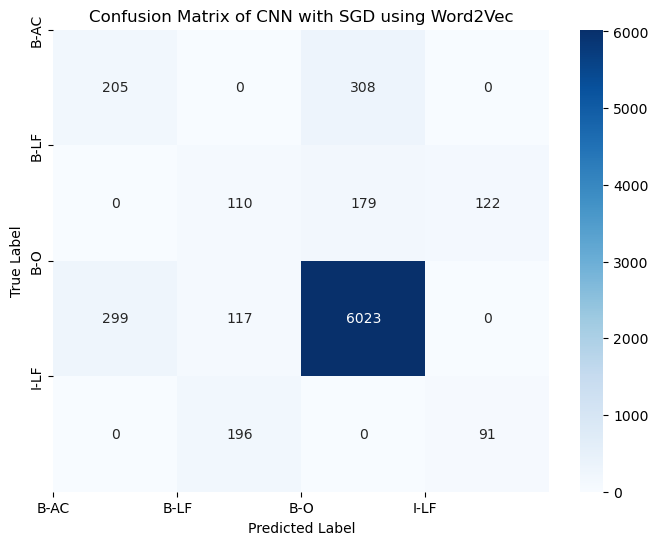

Classification Report of CNN with SGD using Word2Vec:
              precision    recall  f1-score   support

      'b-ac'       0.41      0.40      0.40       513
      'b-lf'       0.26      0.27      0.26       411
       'b-o'       0.93      0.94      0.93      6439
      'i-lf'       0.43      0.32      0.36       287

    accuracy                           0.84      7650
   macro avg       0.50      0.48      0.49      7650
weighted avg       0.84      0.84      0.84      7650



In [47]:
# Converting one-hot encoded predictions back to labels
predicted_indices = np.argmax(cnn_model_6.predict(test_embeddings_pca_array), axis=2)
predicted_labels = [[test_ner[i][j] for j in predicted_indices[i]] for i in range(len(predicted_indices))]

# Similarly, converting one-hot encoded true labels back to labels
true_indices = np.argmax(test_ner_embeddings_pca_array, axis=2)
true_labels = [[test_ner[i][j] for j in true_indices[i]] for i in range(len(true_indices))]

# Flattening the lists of labels
flat_true_labels_4 = [label for sublist in true_labels for label in sublist]
flat_predicted_labels_4 = [label for sublist in predicted_labels for label in sublist]

# Generating and plotting confusion matrix
conf_matrix_10 = confusion_matrix(flat_true_labels_4, flat_predicted_labels_4)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_10, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of CNN with SGD using Word2Vec')
labels = ['B-AC', 'B-LF', 'B-O', 'I-LF']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_10 = classification_report(flat_true_labels_4, flat_predicted_labels_4)
print("Classification Report of CNN with SGD using Word2Vec:")
print(class_report_10)

#### 2.3.8) Implementing GloVe

In [48]:
# Download the GloVe embeddings
glove_model = gensim.downloader.load('glove-wiki-gigaword-100')

# function to get word embeddings for a sentence using GloVe
def get_word_embeddings(sentence, glove_model):
    embeddings = []
    for word in word_tokenize(sentence.lower()):
        if word in glove_model:
            embeddings.append(glove_model[word])
        else:
            embeddings.append(np.zeros(glove_model.vector_size))
    return embeddings

# Tokenizing and generating embeddings
train_embeddings_g = [get_word_embeddings(sentence, glove_model) for sentence in train_documents]
val_embeddings_g = [get_word_embeddings(sentence, glove_model) for sentence in val_documents]
test_embeddings_g = [get_word_embeddings(sentence, glove_model) for sentence in test_documents]

#### 2.3.9) Using PCA for dimensionality reduction 

In [49]:
max_components = 323
n_components = 2

# Applying PCA to reduce dimensionality
pca = PCA(n_components=n_components, svd_solver='full')
train_embeddings_pca_g = [pca.fit_transform(sentence) for sentence in train_embeddings_g]
val_embeddings_pca_g = [pca.transform(sentence) for sentence in val_embeddings_g]
test_embeddings_pca_g = [pca.transform(sentence) for sentence in test_embeddings_g]

# Tokenizing the tokens
train_ner_embeddings_g = [get_word_embeddings(sentence, glove_model) for sentence in train_ner_documents]
val_ner_embeddings_g = [get_word_embeddings(sentence, glove_model) for sentence in val_ner_documents]
test_ner_embeddings_g = [get_word_embeddings(sentence, glove_model) for sentence in test_ner_documents]

# Applying PCA to reduce dimensionality
train_ner_embeddings_pca_g = [pca.fit_transform(sentence) for sentence in train_ner_embeddings_g]
val_ner_embeddings_pca_g = [pca.transform(sentence) for sentence in val_ner_embeddings_g]
test_ner_embeddings_pca_g = [pca.transform(sentence) for sentence in test_ner_embeddings_g]

# Padding the sequences
max_sequence_length = 50
train_embeddings_pca_g_padded = pad_sequences(train_embeddings_pca_g, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
val_embeddings_pca_g_padded = pad_sequences(val_embeddings_pca_g, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
test_embeddings_pca_g_padded = pad_sequences(test_embeddings_pca_g, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
train_ner_embeddings_pca_g_padded = pad_sequences(train_ner_embeddings_pca_g, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
val_ner_embeddings_pca_g_padded = pad_sequences(val_ner_embeddings_pca_g, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
test_ner_embeddings_pca_g_padded = pad_sequences(test_ner_embeddings_pca_g, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')

# Converting the padded sequences to numpy arrays
train_embeddings_pca_g_array = np.array(train_embeddings_pca_g_padded)
val_embeddings_pca_g_array = np.array(val_embeddings_pca_g_padded)
test_embeddings_pca_g_array = np.array(test_embeddings_pca_g_padded)
train_ner_embeddings_pca_g_array = np.array(train_ner_embeddings_pca_g_padded)
val_ner_embeddings_pca_g_array = np.array(val_ner_embeddings_pca_g_padded)
test_ner_embeddings_pca_g_array = np.array(test_ner_embeddings_pca_g_padded)

# Verifying the shape of the arrays
print("train_embeddings_pca_g_array.shape = ", train_embeddings_pca_g_array.shape)
print("val_embeddings_pca_g_array.shape = ", val_embeddings_pca_g_array.shape)
print("test_embeddings_pca_g_array.shape = ", test_embeddings_pca_g_array.shape)
print("train_ner_embeddings_pca_g_array.shape = ", train_ner_embeddings_pca_g_array.shape)
print("val_ner_embeddings_pca_g_array.shape =", val_ner_embeddings_pca_g_array.shape)
print("test_ner_embeddings_pca_g_array.shape =", test_ner_embeddings_pca_g_array.shape)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

train_embeddings_pca_g_array.shape =  (1072, 50, 2)
val_embeddings_pca_g_array.shape =  (126, 50, 2)
test_embeddings_pca_g_array.shape =  (153, 50, 2)
train_ner_embeddings_pca_g_array.shape =  (1072, 50, 2)
val_ner_embeddings_pca_g_array.shape = (126, 50, 2)
test_ner_embeddings_pca_g_array.shape = (153, 50, 2)


#### 2.3.10) Implementing CNN with Adam Optimizer

In [50]:
class CNNModel(Model):
    def __init__(self, sequence_length):
        super(CNNModel, self).__init__()
        self.sequence_length = sequence_length
        self.conv1d_layer1 = layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')
        self.conv1d_layer2 = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')
        self.global_max_pooling = layers.GlobalMaxPooling1D()
        self.dense = layers.Dense(sequence_length * 2, activation='softmax')
    def call(self, inputs):
        x = self.conv1d_layer1(inputs)
        x = self.conv1d_layer2(x)
        x = self.global_max_pooling(x)
        x = self.dense(x)
        return tf.reshape(x, (-1, self.sequence_length, 2))

# Instantiating the CNN model
cnn_model_7 = CNNModel(sequence_length=50)

# Compiling the model
cnn_model_7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = cnn_model_7.fit(x=train_embeddings_pca_g_array, y=train_ner_embeddings_pca_g_array, epochs=10, batch_size=16, validation_data=(val_embeddings_pca_g_array, val_ner_embeddings_pca_g_array))

# Evaluating the model
results = cnn_model_7.evaluate(x=test_embeddings_pca_g_array, y=test_ner_embeddings_pca_g_array)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9192 - loss: 0.0747 - val_accuracy: 0.4051 - val_loss: 0.0047
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4110 - loss: -0.0241 - val_accuracy: 0.3657 - val_loss: -0.0949
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3714 - loss: -0.1226 - val_accuracy: 0.3657 - val_loss: -0.1945
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3701 - loss: -0.2210 - val_accuracy: 0.3657 - val_loss: -0.2942
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3705 - loss: -0.3199 - val_accuracy: 0.3657 - val_loss: -0.3939
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3750 - loss: -0.4158 - val_accuracy: 0.3657 - val_loss: -0.4936
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3673 - loss: -0.5202 - val_accuracy: 0.3657 - val_loss: -0.5936
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3774 - loss: -0.6103 - val_accuracy: 0.365

#### 2.3.11)Plotting Classification Report and Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


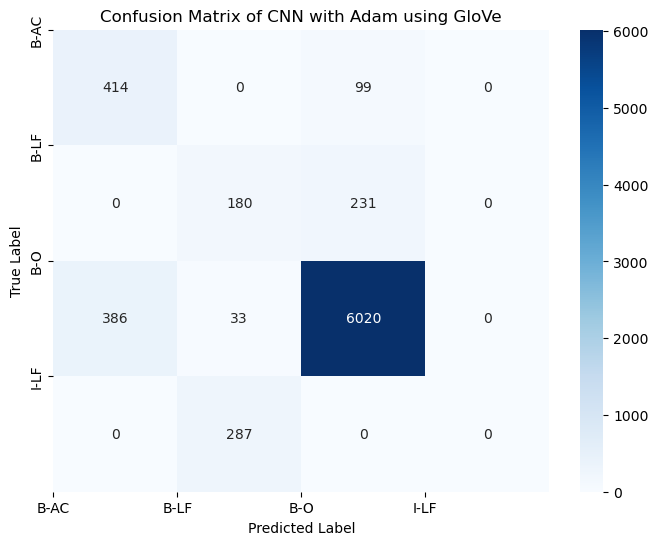

Classification Report of CNN with Adam using GloVe:
              precision    recall  f1-score   support

      'b-ac'       0.52      0.81      0.63       513
      'b-lf'       0.36      0.44      0.40       411
       'b-o'       0.95      0.93      0.94      6439
      'i-lf'       0.00      0.00      0.00       287

    accuracy                           0.86      7650
   macro avg       0.46      0.54      0.49      7650
weighted avg       0.85      0.86      0.86      7650



C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [51]:
# Converting one-hot encoded predictions back to labels
predicted_indices = np.argmax(cnn_model_7.predict(test_embeddings_pca_g_array), axis=2)
predicted_labels = [[test_ner[i][j] for j in predicted_indices[i]] for i in range(len(predicted_indices))]

# Similarly, converting one-hot encoded true labels back to labels
true_indices = np.argmax(test_ner_embeddings_pca_g_array, axis=2)
true_labels = [[test_ner[i][j] for j in true_indices[i]] for i in range(len(true_indices))]

# Flattening the lists of labels
flat_true_labels_5 = [label for sublist in true_labels for label in sublist]
flat_predicted_labels_5 = [label for sublist in predicted_labels for label in sublist]

# Generating and plotting confusion matrix
conf_matrix_11 = confusion_matrix(flat_true_labels_5, flat_predicted_labels_5)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_11, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of CNN with Adam using GloVe')
labels = ['B-AC', 'B-LF', 'B-O', 'I-LF']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_11 = classification_report(flat_true_labels_5, flat_predicted_labels_5)
print("Classification Report of CNN with Adam using GloVe:")
print(class_report_11)

#### 2.3.12) Implementing CNN with SGD optimizer

In [52]:
# Instantiating the CNN model
cnn_model_8 = CNNModel(sequence_length=50)

# Compiling the model
cnn_model_8.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = cnn_model_8.fit(x=train_embeddings_pca_g_array, y=train_ner_embeddings_pca_g_array, epochs=10, batch_size=16, validation_data=(val_embeddings_pca_g_array, val_ner_embeddings_pca_g_array))

# Evaluating the model
results = cnn_model_8.evaluate(x=test_embeddings_pca_g_array, y=test_ner_embeddings_pca_g_array)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9295 - loss: 0.0915 - val_accuracy: 0.9743 - val_loss: 0.0717
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9722 - loss: 0.0608 - val_accuracy: 0.9743 - val_loss: 0.0392
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9723 - loss: 0.0272 - val_accuracy: 0.9743 - val_loss: 0.0066
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9690 - loss: -0.0051 - val_accuracy: 0.9743 - val_loss: -0.0259
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9667 - loss: -0.0375 - val_accuracy: 0.9743 - val_loss: -0.0585
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9685 - loss: -0.0695 - val_accuracy: 0.9743 - val_loss: -0.0910
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9694 - loss: -0.1014 - val_accuracy: 0.9743 - val_loss: -0.1235
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9681 - loss: -0.1333 - val_accuracy: 0.9743 - 

#### 2.3.13) Plotting Classification Report and Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


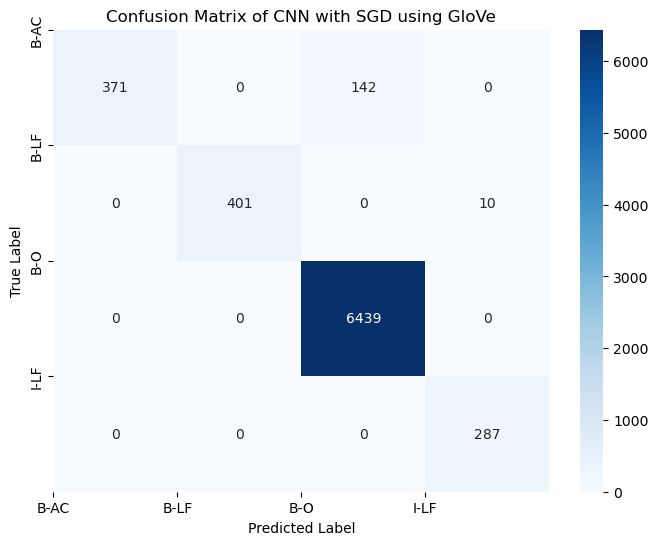

Classification Report of CNN with SGD using GloVe:
              precision    recall  f1-score   support

      'b-ac'       1.00      0.72      0.84       513
      'b-lf'       1.00      0.98      0.99       411
       'b-o'       0.98      1.00      0.99      6439
      'i-lf'       0.97      1.00      0.98       287

    accuracy                           0.98      7650
   macro avg       0.99      0.92      0.95      7650
weighted avg       0.98      0.98      0.98      7650



In [53]:
# Converting one-hot encoded predictions back to labels
predicted_indices = np.argmax(cnn_model_8.predict(test_embeddings_pca_g_array), axis=2)
predicted_labels = [[test_ner[i][j] for j in predicted_indices[i]] for i in range(len(predicted_indices))]

# Similarly, converting one-hot encoded true labels back to labels
true_indices = np.argmax(test_ner_embeddings_pca_array, axis=2)
true_labels = [[test_ner[i][j] for j in true_indices[i]] for i in range(len(true_indices))]

# Flattening the lists of labels
flat_true_labels_6 = [label for sublist in true_labels for label in sublist]
flat_predicted_labels_6 = [label for sublist in predicted_labels for label in sublist]

# Generating and plotting confusion matrix
conf_matrix_12 = confusion_matrix(flat_true_labels_6, flat_predicted_labels_6)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_12, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of CNN with SGD using GloVe')
labels = ['B-AC', 'B-LF', 'B-O', 'I-LF']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_12 = classification_report(flat_true_labels_6, flat_predicted_labels_6)
print("Classification Report of CNN with SGD using GloVe:")
print(class_report_12)

### 2.4) Comparison between RNN and FFNN on both Word2Vec and GloVe using PCA
#### 2.4.1) Data extraction

In [54]:
# Extacting data
train_data = dataset["train"]
validation_data = dataset["validation"]
test_data = dataset["test"]

# getting tokens and ner_tags
train_tokens = train_data["tokens"]
val_tokens = validation_data["tokens"]
test_tokens = test_data["tokens"]
train_ner = train_data["ner_tags"]
val_ner = validation_data["ner_tags"]
test_ner = test_data["ner_tags"]

# Converting all tokens in the list to lowercase
train_ner = [str(token).lower() for token in train_ner]
val_ner = [str(token).lower() for token in val_ner]
test_ner = [str(token).lower() for token in test_ner]

# Removing the double quotes and split each string into a list of tokens
train_ner = [token[1:-1].split(", ") for token in train_ner]
val_ner = [token[1:-1].split(", ") for token in val_ner]
test_ner = [token[1:-1].split(", ") for token in test_ner]

# Converting each list of tokens into a single string
train_ner_documents = [' '.join(tokens) for tokens in train_ner]
val_ner_documents = [' '.join(tokens) for tokens in val_ner]
test_ner_documents = [' '.join(tokens) for tokens in test_ner]

# Removing single quotes from each token within the inner lists
train_tokens = [[token.strip("'") for token in sentence] for sentence in train_ner]
val_tokens = [[token.strip("'") for token in sentence] for sentence in val_ner]
test_tokens = [[token.strip("'") for token in sentence] for sentence in test_ner]

# Converting each list of tokens into a single string
train_documents = [' '.join(tokens) for tokens in train_tokens]
val_documents = [' '.join(tokens) for tokens in val_tokens]
test_documents = [' '.join(tokens) for tokens in test_tokens]
combined_documents = train_documents + val_documents + test_documents

#### 2.4.2) Implementing Word2Vec

In [55]:
# building a corpus
corpus = combined_documents
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Training Word2Vec model with vector size 2
word2vec_model = Word2Vec(tokenized_corpus, vector_size=2, window=5, min_count=1, workers=4)

# function to get word embeddings for a sentence using Word2Vec
def get_word_embeddings(sentence, word2vec_model):
    embeddings = []
    for word in word_tokenize(sentence.lower()):
        if word in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[word])
        else:
            embeddings.append(np.zeros(word2vec_model.vector_size))
    return embeddings

# Tokenizing the tokens
train_embeddings = [get_word_embeddings(sentence, word2vec_model) for sentence in train_documents]
val_embeddings = [get_word_embeddings(sentence, word2vec_model) for sentence in val_documents]
test_embeddings = [get_word_embeddings(sentence, word2vec_model) for sentence in test_documents]

#### 2.4.3) Implementing PCA

In [56]:
max_components = 323
n_components = 2

# Applying PCA to reduce dimensionality
pca = PCA(n_components=n_components, svd_solver='full')
train_embeddings_pca = [pca.fit_transform(sentence) for sentence in train_embeddings]
val_embeddings_pca = [pca.transform(sentence) for sentence in val_embeddings]
test_embeddings_pca = [pca.transform(sentence) for sentence in test_embeddings]

# Tokenizing the tokens
train_ner_embeddings = [get_word_embeddings(sentence, word2vec_model) for sentence in train_ner_documents]
val_ner_embeddings = [get_word_embeddings(sentence, word2vec_model) for sentence in val_ner_documents]
test_ner_embeddings = [get_word_embeddings(sentence, word2vec_model) for sentence in test_ner_documents]

# Applying PCA to reduce dimensionality
train_ner_embeddings_pca = [pca.fit_transform(sentence) for sentence in train_ner_embeddings]
val_ner_embeddings_pca = [pca.transform(sentence) for sentence in val_ner_embeddings]
test_ner_embeddings_pca = [pca.transform(sentence) for sentence in test_ner_embeddings]

# Defining the maximum sequence length
max_sequence_length = 50

# Pading the sequences
train_embeddings_pca_padded = pad_sequences(train_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
val_embeddings_pca_padded = pad_sequences(val_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
test_embeddings_pca_padded = pad_sequences(test_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
train_ner_embeddings_pca_padded = pad_sequences(train_ner_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
val_ner_embeddings_pca_padded = pad_sequences(val_ner_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
test_ner_embeddings_pca_padded = pad_sequences(test_ner_embeddings_pca, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')

# Converting the padded sequences to numpy arrays
train_embeddings_pca_array = np.array(train_embeddings_pca_padded)
val_embeddings_pca_array = np.array(val_embeddings_pca_padded)
test_embeddings_pca_array = np.array(test_embeddings_pca_padded)
train_ner_embeddings_pca_array = np.array(train_ner_embeddings_pca_padded)
val_ner_embeddings_pca_array = np.array(val_ner_embeddings_pca_padded)
test_ner_embeddings_pca_array = np.array(test_ner_embeddings_pca_padded)

# Verifying the shape of the arrays
print("train_embeddings_pca_array.shape = ", train_embeddings_pca_array.shape)
print("val_embeddings_pca_array.shape = ", val_embeddings_pca_array.shape)
print("test_embeddings_pca_array.shape = ", test_embeddings_pca_array.shape)
print("train_ner_embeddings_pca_array.shape = ", train_ner_embeddings_pca_array.shape)
print("val_ner_embeddings_pca_array.shape =", val_ner_embeddings_pca_array.shape)
print("test_ner_embeddings_pca_array.shape =", test_ner_embeddings_pca_array.shape)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

train_embeddings_pca_array.shape =  (1072, 50, 2)
val_embeddings_pca_array.shape =  (126, 50, 2)
test_embeddings_pca_array.shape =  (153, 50, 2)
train_ner_embeddings_pca_array.shape =  (1072, 50, 2)
val_ner_embeddings_pca_array.shape = (126, 50, 2)
test_ner_embeddings_pca_array.shape = (153, 50, 2)


#### 2.4.4) Implementing RNN on Word2Vec

In [57]:
class RNNModel(Model):
    def __init__(self, sequence_length):
        super(RNNModel, self).__init__()
        self.sequence_length = sequence_length
        self.rnn_layer = layers.SimpleRNN(units=64, activation='relu', return_sequences=True)
        self.dense = layers.Dense(2, activation='softmax')  # Output dimension changed to match target data

    def call(self, inputs):
        x = self.rnn_layer(inputs)
        x = self.dense(x)
        return x

# Instantiating the RNN model
rnn_model_5 = RNNModel(sequence_length=50)

# Compiling the model
rnn_model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_rnn = rnn_model_5.fit(x=train_embeddings_pca_array, y=train_ner_embeddings_pca_array, epochs=10, batch_size=16, validation_data=(val_embeddings_pca_array, val_ner_embeddings_pca_array))

# Evaluating the model
results_rnn = rnn_model_5.evaluate(x=test_embeddings_pca_array, y=test_ner_embeddings_pca_array)
print("Test loss:", results_rnn[0])
print("Test accuracy:", results_rnn[1])

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.3630 - loss: 0.6718 - val_accuracy: 0.6602 - val_loss: 0.1388
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3607 - loss: 0.2333 - val_accuracy: 0.6744 - val_loss: -0.4943
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3706 - loss: 11201217799651328.0000 - val_accuracy: 0.6902 - val_loss: 4187686260703232.0000
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3603 - loss: -706948194369536.0000 - val_accuracy: 0.6622 - val_loss: 1142519758848.0000
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3609 - loss: -923824881664.0000 - val_accuracy: 0.6622 - val_loss: 1132540592128.0000
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.3653 - loss: -960638287872.0000 - val_accuracy: 0.6622 - val_loss: 1132757254144.0000
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.3641 - loss: -1060187799552.0000 - val_accuracy: 0.6508 - val_loss

#### 2.4.5) Plotting classification report and Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


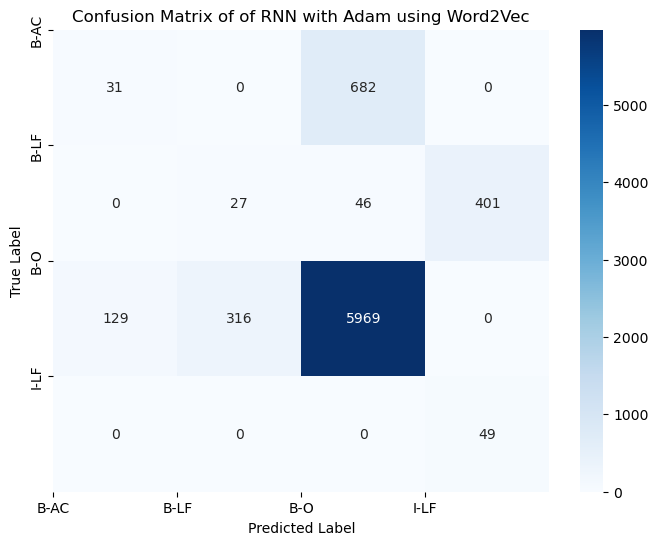

Classification Report of RNN with Adam using Word2Vec:
              precision    recall  f1-score   support

      'b-ac'       0.19      0.04      0.07       713
      'b-lf'       0.08      0.06      0.07       474
       'b-o'       0.89      0.93      0.91      6414
      'i-lf'       0.11      1.00      0.20        49

    accuracy                           0.79      7650
   macro avg       0.32      0.51      0.31      7650
weighted avg       0.77      0.79      0.78      7650



In [58]:
# Converting one-hot encoded predictions back to labels
predicted_indices = np.argmax(rnn_model_5.predict(test_embeddings_pca_array), axis=2)
predicted_labels = [[test_ner[i][j] for j in predicted_indices[i]] for i in range(len(predicted_indices))]

# Similarly, converting one-hot encoded true labels back to labels
true_indices = np.argmax(test_embeddings_pca_array, axis=2)
true_labels = [[test_ner[i][j] for j in true_indices[i]] for i in range(len(true_indices))]

# Flattening the lists of labels
flat_true_labels = [label for sublist in true_labels for label in sublist]
flat_predicted_labels = [label for sublist in predicted_labels for label in sublist]

# Generating and plotting confusion matrix
conf_matrix_13 = confusion_matrix(flat_true_labels, flat_predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_13, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of of RNN with Adam using Word2Vec')
labels = ['B-AC', 'B-LF', 'B-O', 'I-LF']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_13 = classification_report(flat_true_labels, flat_predicted_labels)
print("Classification Report of RNN with Adam using Word2Vec:")
print(class_report_13)

#### 2.4.6) Implementing FFNN on Word2Vec

In [59]:
class FFNNModel(Model):
    def __init__(self, sequence_length):
        super(FFNNModel, self).__init__()
        self.sequence_length = sequence_length
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(sequence_length * 2, activation='softmax')

    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense1(x)
        x = self.dense2(x)
        return tf.reshape(x, (-1, self.sequence_length, 2))

# Instantiating the FFNN model
ffnn_model_1 = FFNNModel(sequence_length=50)

# Compiling the model
ffnn_model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_ffnn = ffnn_model_1.fit(x=train_embeddings_pca_array, y=train_ner_embeddings_pca_array, epochs=10, batch_size=16, validation_data=(val_embeddings_pca_array, val_ner_embeddings_pca_array))

# Evaluating the model
results_ffnn = ffnn_model_1.evaluate(x=test_embeddings_pca_array, y=test_ner_embeddings_pca_array)
print("Test loss:", results_ffnn[0])
print("Test accuracy:", results_ffnn[1])

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6051 - loss: -0.0349 - val_accuracy: 0.0830 - val_loss: 0.1299
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7227 - loss: -0.6400 - val_accuracy: 0.0822 - val_loss: 0.3448
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7317 - loss: -1.3485 - val_accuracy: 0.0792 - val_loss: 0.5513
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7286 - loss: -1.6011 - val_accuracy: 0.0762 - val_loss: 0.6284
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7321 - loss: -1.7283 - val_accuracy: 0.0740 - val_loss: 0.6793
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7478 - loss: -1.7991 - val_accuracy: 0.0729 - val_loss: 0.6932
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7202 - loss: -1.7213 - val_accuracy: 0.0719 - val_loss: 0.7126
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7399 - loss: -1.8628 - val_accuracy: 0.0717 - v

#### 2.4.7) Plotting classification report and Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


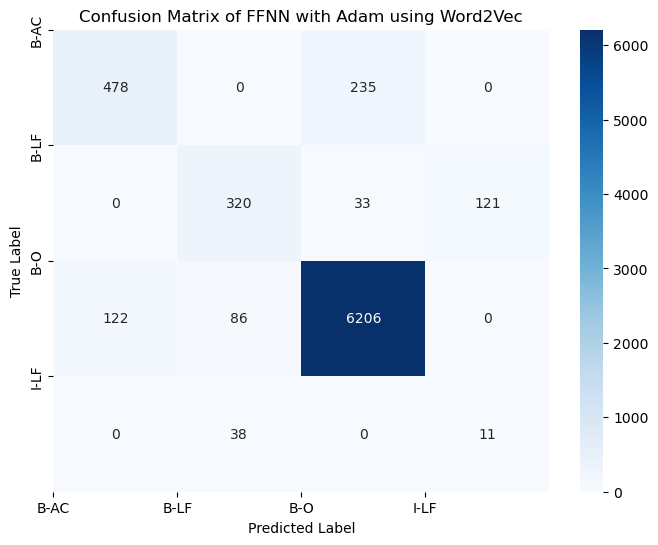

Classification Report of FFNN with Adam using Word2Vec:
              precision    recall  f1-score   support

      'b-ac'       0.80      0.67      0.73       713
      'b-lf'       0.72      0.68      0.70       474
       'b-o'       0.96      0.97      0.96      6414
      'i-lf'       0.08      0.22      0.12        49

    accuracy                           0.92      7650
   macro avg       0.64      0.63      0.63      7650
weighted avg       0.92      0.92      0.92      7650



In [60]:
# Converting one-hot encoded predictions back to labels
predicted_indices = np.argmax(ffnn_model_1.predict(test_embeddings_pca_array), axis=2)
predicted_labels = [[test_ner[i][j] for j in predicted_indices[i]] for i in range(len(predicted_indices))]

# Similarly, converting one-hot encoded true labels back to labels
true_indices = np.argmax(test_embeddings_pca_array, axis=2)
true_labels = [[test_ner[i][j] for j in true_indices[i]] for i in range(len(true_indices))]

# Flattening the lists of labels
flat_true_labels = [label for sublist in true_labels for label in sublist]
flat_predicted_labels = [label for sublist in predicted_labels for label in sublist]

# Generating and plotting confusion matrix
conf_matrix_14 = confusion_matrix(flat_true_labels, flat_predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_14, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of FFNN with Adam using Word2Vec')
labels = ['B-AC', 'B-LF', 'B-O', 'I-LF']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_14 = classification_report(flat_true_labels, flat_predicted_labels)
print("Classification Report of FFNN with Adam using Word2Vec:")
print(class_report_14)

#### 2.4.8) Implementing GloVe

In [61]:
# Download the GloVe embeddings
glove_model = gensim.downloader.load('glove-wiki-gigaword-100')

# function to get word embeddings for a sentence using GloVe
def get_word_embeddings(sentence, glove_model):
    embeddings = []
    for word in word_tokenize(sentence.lower()):
        if word in glove_model:
            embeddings.append(glove_model[word])
        else:
            embeddings.append(np.zeros(glove_model.vector_size))
    return embeddings

# Tokenizing and generating embeddings
train_embeddings_g = [get_word_embeddings(sentence, glove_model) for sentence in train_documents]
val_embeddings_g = [get_word_embeddings(sentence, glove_model) for sentence in val_documents]
test_embeddings_g = [get_word_embeddings(sentence, glove_model) for sentence in test_documents]

#### 2.4.9) Implementing PCA

In [62]:
max_components = 323
n_components = 2

# Applying PCA to reduce dimensionality
pca = PCA(n_components=n_components, svd_solver='full')
train_embeddings_pca_g = [pca.fit_transform(sentence) for sentence in train_embeddings_g]
val_embeddings_pca_g = [pca.transform(sentence) for sentence in val_embeddings_g]
test_embeddings_pca_g = [pca.transform(sentence) for sentence in test_embeddings_g]

# Tokenizing the tokens
train_ner_embeddings_g = [get_word_embeddings(sentence, glove_model) for sentence in train_ner_documents]
val_ner_embeddings_g = [get_word_embeddings(sentence, glove_model) for sentence in val_ner_documents]
test_ner_embeddings_g = [get_word_embeddings(sentence, glove_model) for sentence in test_ner_documents]

# Applying PCA to reduce dimensionality
train_ner_embeddings_pca_g = [pca.fit_transform(sentence) for sentence in train_ner_embeddings_g]
val_ner_embeddings_pca_g = [pca.transform(sentence) for sentence in val_ner_embeddings_g]
test_ner_embeddings_pca_g = [pca.transform(sentence) for sentence in test_ner_embeddings_g]

# Padding the sequences
max_sequence_length = 50
train_embeddings_pca_g_padded = pad_sequences(train_embeddings_pca_g, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
val_embeddings_pca_g_padded = pad_sequences(val_embeddings_pca_g, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
test_embeddings_pca_g_padded = pad_sequences(test_embeddings_pca_g, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
train_ner_embeddings_pca_g_padded = pad_sequences(train_ner_embeddings_pca_g, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
val_ner_embeddings_pca_g_padded = pad_sequences(val_ner_embeddings_pca_g, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')
test_ner_embeddings_pca_g_padded = pad_sequences(test_ner_embeddings_pca_g, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')

# Converting the padded sequences to numpy arrays
train_embeddings_pca_g_array = np.array(train_embeddings_pca_g_padded)
val_embeddings_pca_g_array = np.array(val_embeddings_pca_g_padded)
test_embeddings_pca_g_array = np.array(test_embeddings_pca_g_padded)
train_ner_embeddings_pca_g_array = np.array(train_ner_embeddings_pca_g_padded)
val_ner_embeddings_pca_g_array = np.array(val_ner_embeddings_pca_g_padded)
test_ner_embeddings_pca_g_array = np.array(test_ner_embeddings_pca_g_padded)

# Verifying the shape of the arrays
print("train_embeddings_pca_g_array.shape = ", train_embeddings_pca_g_array.shape)
print("val_embeddings_pca_g_array.shape = ", val_embeddings_pca_g_array.shape)
print("test_embeddings_pca_g_array.shape = ", test_embeddings_pca_g_array.shape)
print("train_ner_embeddings_pca_g_array.shape = ", train_ner_embeddings_pca_g_array.shape)
print("val_ner_embeddings_pca_g_array.shape =", val_ner_embeddings_pca_g_array.shape)
print("test_ner_embeddings_pca_g_array.shape =", test_ner_embeddings_pca_g_array.shape)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_

train_embeddings_pca_g_array.shape =  (1072, 50, 2)
val_embeddings_pca_g_array.shape =  (126, 50, 2)
test_embeddings_pca_g_array.shape =  (153, 50, 2)
train_ner_embeddings_pca_g_array.shape =  (1072, 50, 2)
val_ner_embeddings_pca_g_array.shape = (126, 50, 2)
test_ner_embeddings_pca_g_array.shape = (153, 50, 2)


#### 2.4.10) Implementing RNN on GloVe

In [63]:
class RNNModel(Model):
    def __init__(self, sequence_length):
        super(RNNModel, self).__init__()
        self.sequence_length = sequence_length
        self.rnn_layer = layers.SimpleRNN(units=64, activation='relu', return_sequences=True)
        self.dense = layers.Dense(2, activation='softmax')  # Output dimension changed to match target data

    def call(self, inputs):
        x = self.rnn_layer(inputs)
        x = self.dense(x)
        return x

# Instantiating the RNN model
rnn_model_6 = RNNModel(sequence_length=50)

# Compiling the model
rnn_model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_rnn = rnn_model_6.fit(x=train_embeddings_pca_g_array, y=train_ner_embeddings_pca_g_array, epochs=10, batch_size=16, validation_data=(val_embeddings_pca_g_array, val_ner_embeddings_pca_g_array))

# Evaluating the model
results_rnn = rnn_model_6.evaluate(x=test_embeddings_pca_g_array, y=test_ner_embeddings_pca_g_array)
print("Test loss:", results_rnn[0])
print("Test accuracy:", results_rnn[1])

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.4471 - loss: 0.6852 - val_accuracy: 0.3657 - val_loss: 0.6617
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3696 - loss: 0.6541 - val_accuracy: 0.3657 - val_loss: 0.6319
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.3734 - loss: 0.6246 - val_accuracy: 0.3657 - val_loss: 0.6037
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3714 - loss: 0.5967 - val_accuracy: 0.3657 - val_loss: 0.5769
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3701 - loss: 0.5703 - val_accuracy: 0.3657 - val_loss: 0.5516
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3720 - loss: 0.5452 - val_accuracy: 0.3657 - val_loss: 0.5277
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.3721 - loss: 0.5217 - val_accuracy: 0.3657 - val_loss: 0.5051
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3750 - loss: 0.4990 - val_accuracy: 0.3657 - v

#### 2.4.11) Plotting classification report and Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


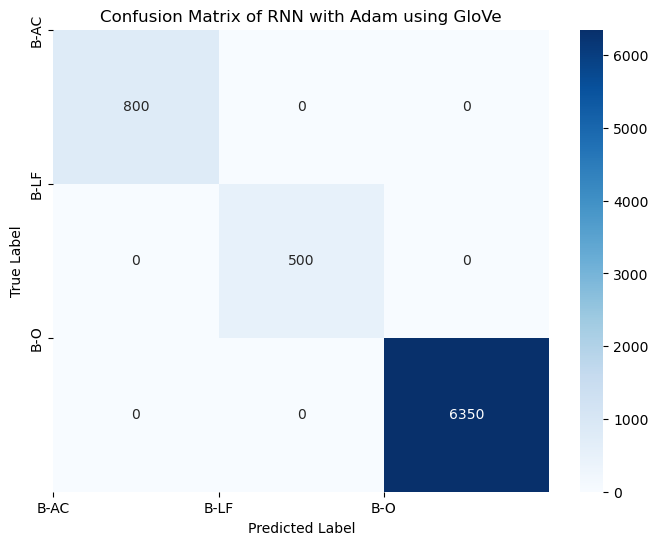

Classification Report of RNN with Adam using GloVe:
              precision    recall  f1-score   support

      'b-ac'       1.00      1.00      1.00       800
      'b-lf'       1.00      1.00      1.00       500
       'b-o'       1.00      1.00      1.00      6350

    accuracy                           1.00      7650
   macro avg       1.00      1.00      1.00      7650
weighted avg       1.00      1.00      1.00      7650



In [64]:
# Converting one-hot encoded predictions back to labels
predicted_indices = np.argmax(rnn_model_6.predict(test_embeddings_pca_g_array), axis=2)
predicted_labels = [[test_ner[i][j] for j in predicted_indices[i]] for i in range(len(predicted_indices))]

# Similarly, converting one-hot encoded true labels back to labels
true_indices = np.argmax(test_embeddings_pca_g_array, axis=2)
true_labels = [[test_ner[i][j] for j in true_indices[i]] for i in range(len(true_indices))]

# Flattening the lists of labels
flat_true_labels = [label for sublist in true_labels for label in sublist]
flat_predicted_labels = [label for sublist in predicted_labels for label in sublist]

# Generating and plotting confusion matrix
conf_matrix_15 = confusion_matrix(flat_true_labels, flat_predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_15, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of RNN with Adam using GloVe')
labels = ['B-AC', 'B-LF', 'B-O']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_15 = classification_report(flat_true_labels, flat_predicted_labels)
print("Classification Report of RNN with Adam using GloVe:")
print(class_report_15)

#### 2.4.12) Implementing FFNN on GloVe

In [65]:
class FFNNModel(Model):
    def __init__(self, sequence_length):
        super(FFNNModel, self).__init__()
        self.sequence_length = sequence_length
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(sequence_length * 2, activation='softmax')

    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense1(x)
        x = self.dense2(x)
        return tf.reshape(x, (-1, self.sequence_length, 2))

# Instantiating the FFNN model
ffnn_model_2 = FFNNModel(sequence_length=50)

# Compiling the model
ffnn_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_ffnn = ffnn_model_2.fit(x=train_embeddings_pca_g_array, y=train_ner_embeddings_pca_g_array, epochs=10, batch_size=16, validation_data=(val_embeddings_pca_g_array, val_ner_embeddings_pca_g_array))

# Evaluating the model
results_ffnn = ffnn_model_2.evaluate(x=test_embeddings_pca_g_array, y=test_ner_embeddings_pca_g_array)
print("Test loss:", results_ffnn[0])
print("Test accuracy:", results_ffnn[1])

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9191 - loss: 0.0748 - val_accuracy: 0.3657 - val_loss: 0.0047
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3725 - loss: -0.0239 - val_accuracy: 0.3657 - val_loss: -0.0949
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3664 - loss: -0.1226 - val_accuracy: 0.3657 - val_loss: -0.1947
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3698 - loss: -0.2199 - val_accuracy: 0.3657 - val_loss: -0.2943
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3735 - loss: -0.3181 - val_accuracy: 0.3657 - val_loss: -0.3938
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3721 - loss: -0.4180 - val_accuracy: 0.3657 - val_loss: -0.4937
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3741 - loss: -0.5160 - val_accuracy: 0.3657 - val_loss: -0.5934
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3701 - loss: -0.6174 - val_accuracy: 0.36

#### 2.4.13) Plotting classification report and Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


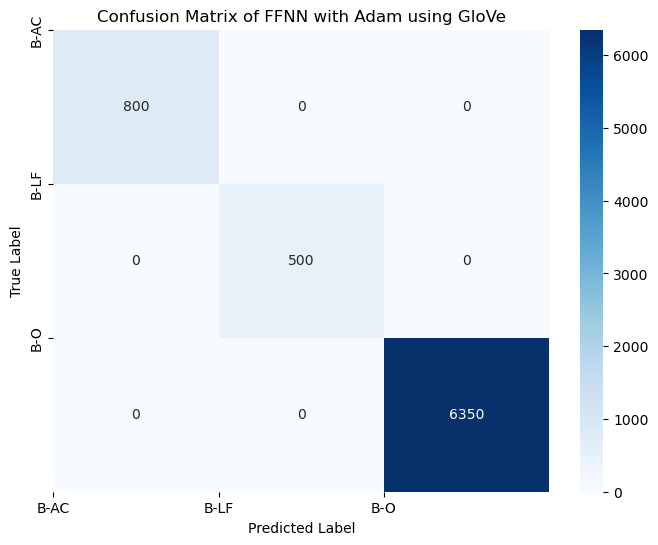

Classification Report of FFNN with Adam using GloVe:
              precision    recall  f1-score   support

      'b-ac'       1.00      1.00      1.00       800
      'b-lf'       1.00      1.00      1.00       500
       'b-o'       1.00      1.00      1.00      6350

    accuracy                           1.00      7650
   macro avg       1.00      1.00      1.00      7650
weighted avg       1.00      1.00      1.00      7650



In [66]:
# Converting one-hot encoded predictions back to labels
predicted_indices = np.argmax(ffnn_model_2.predict(test_embeddings_pca_g_array), axis=2)
predicted_labels = [[test_ner[i][j] for j in predicted_indices[i]] for i in range(len(predicted_indices))]

# Similarly, converting one-hot encoded true labels back to labels
true_indices = np.argmax(test_embeddings_pca_g_array, axis=2)
true_labels = [[test_ner[i][j] for j in true_indices[i]] for i in range(len(true_indices))]

# Flattening the lists of labels
flat_true_labels = [label for sublist in true_labels for label in sublist]
flat_predicted_labels = [label for sublist in predicted_labels for label in sublist]

# Generating and plotting confusion matrix
conf_matrix_16 = confusion_matrix(flat_true_labels, flat_predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_16, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of FFNN with Adam using GloVe')
labels = ['B-AC', 'B-LF', 'B-O']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()

# Generating classification report
class_report_16 = classification_report(flat_true_labels, flat_predicted_labels)
print("Classification Report of FFNN with Adam using GloVe:")
print(class_report_16)

### End of Experiments

## Comparison Plots for Report

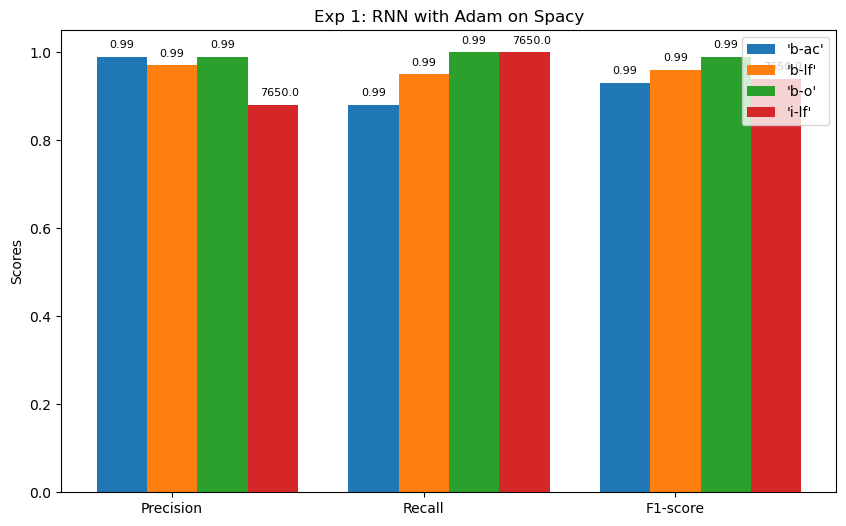

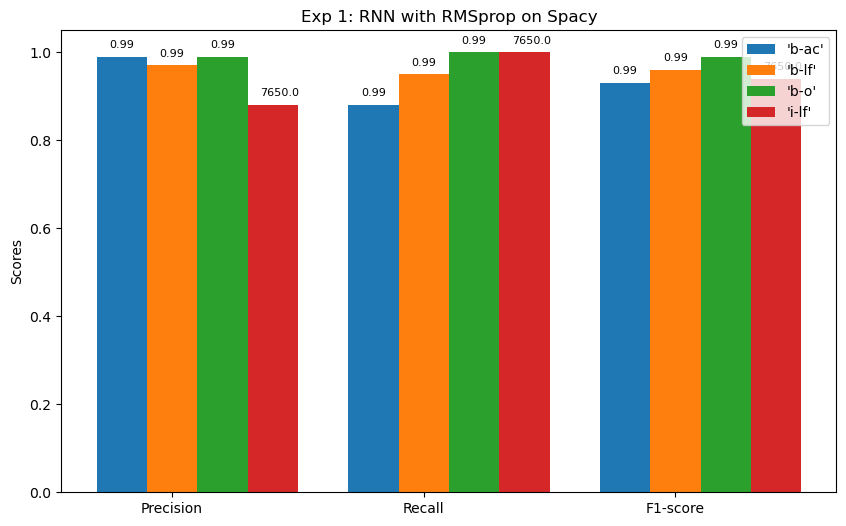

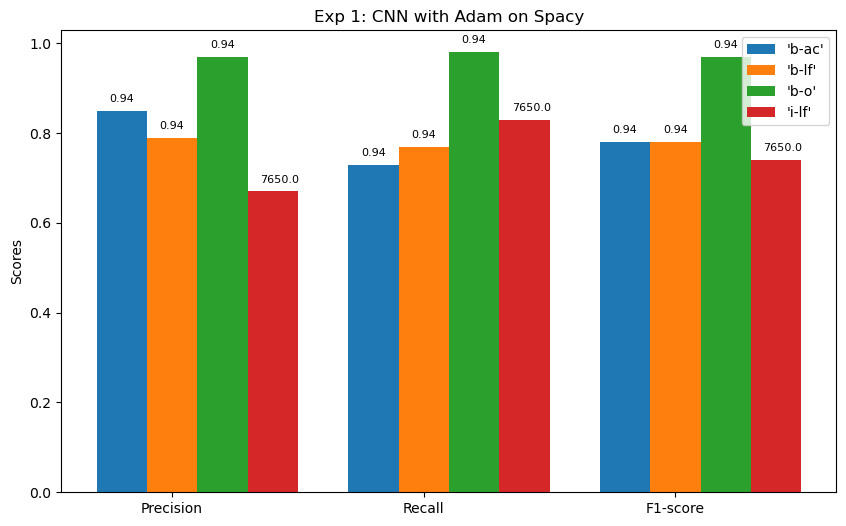

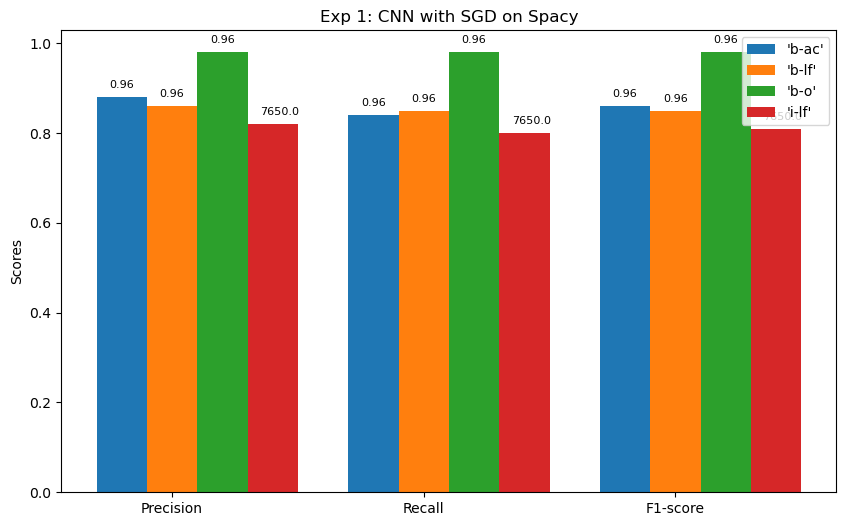

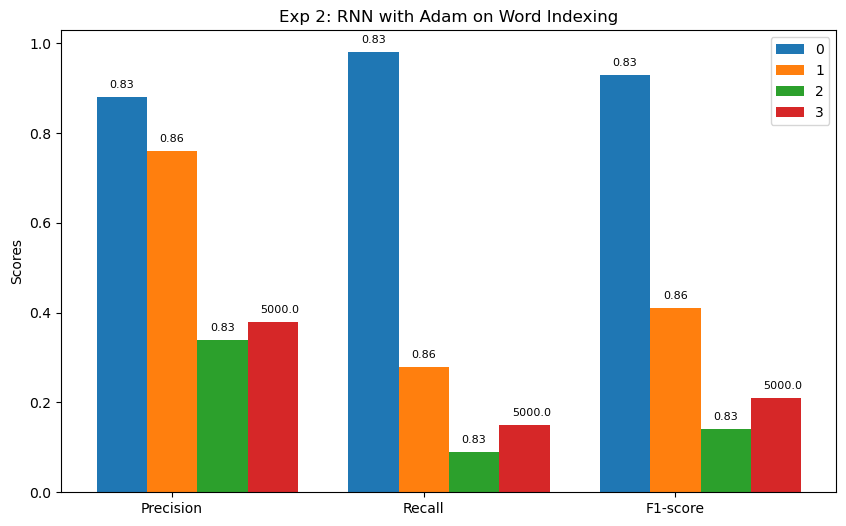

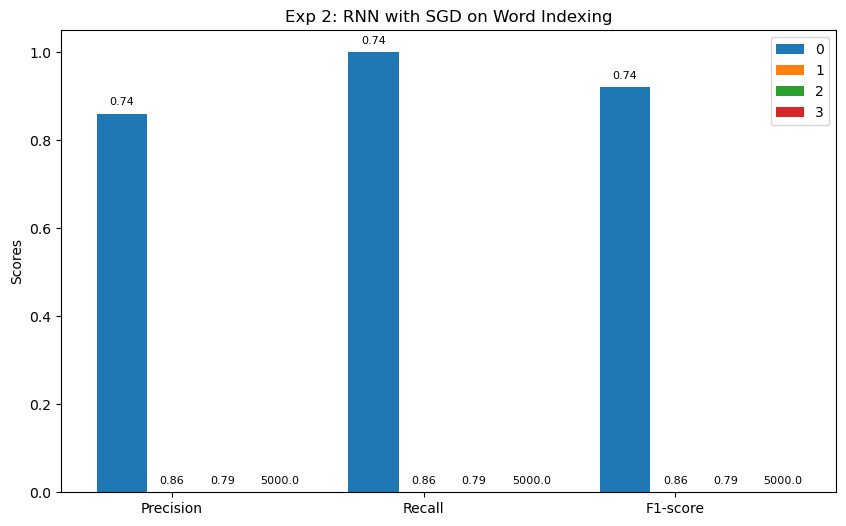

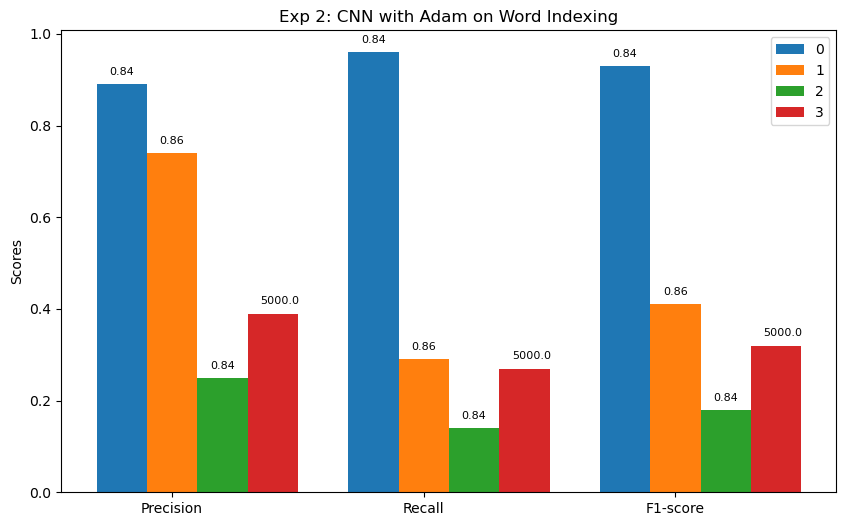

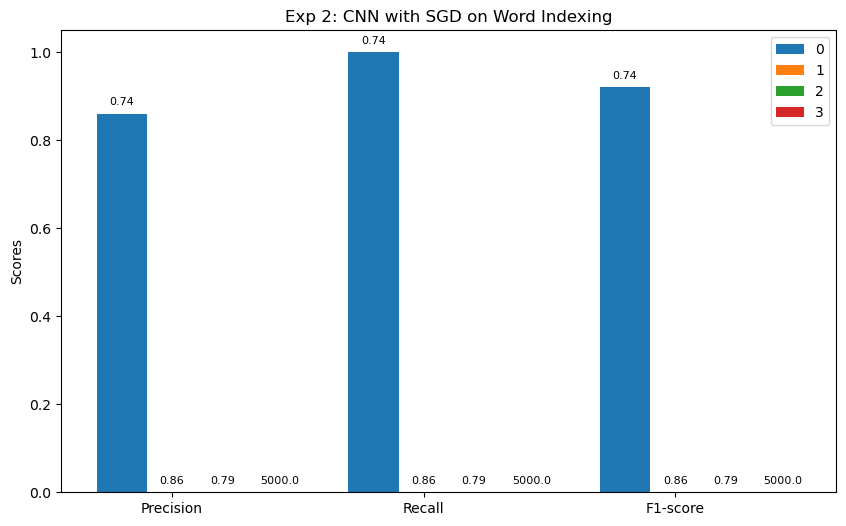

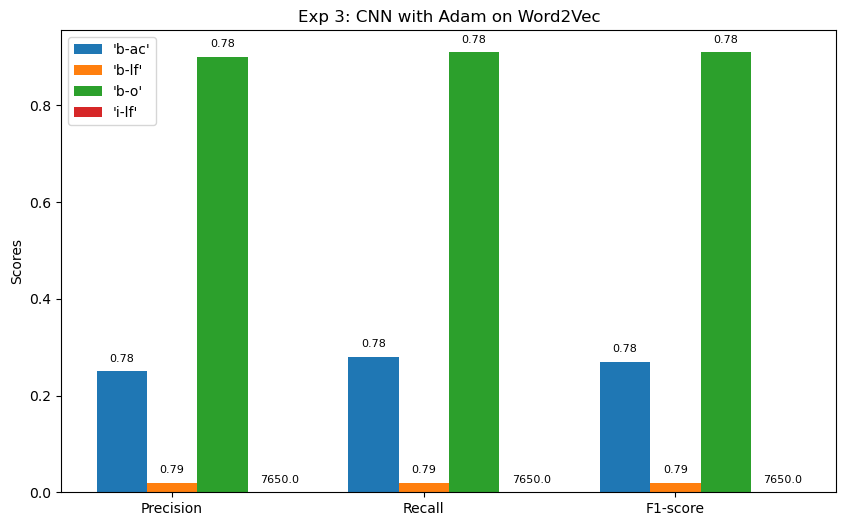

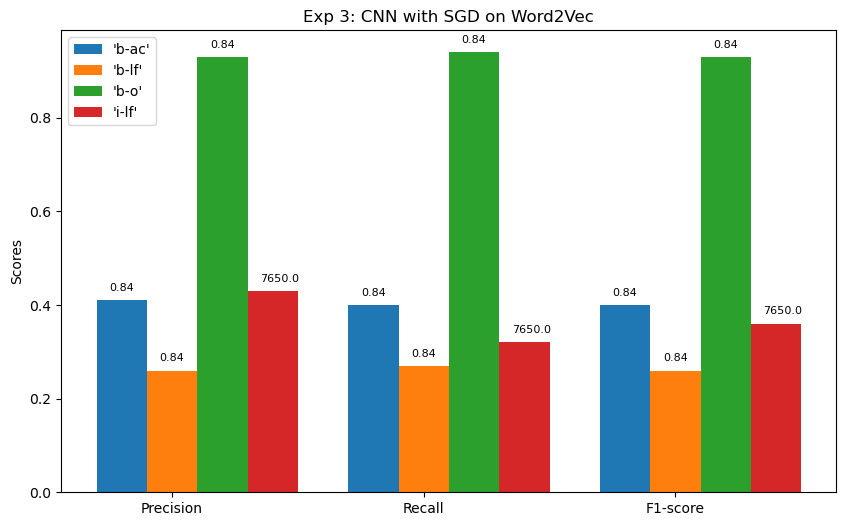

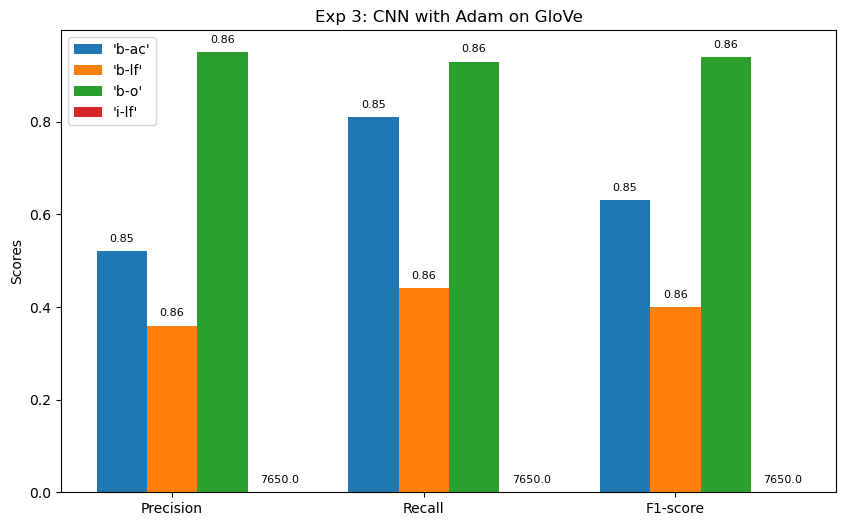

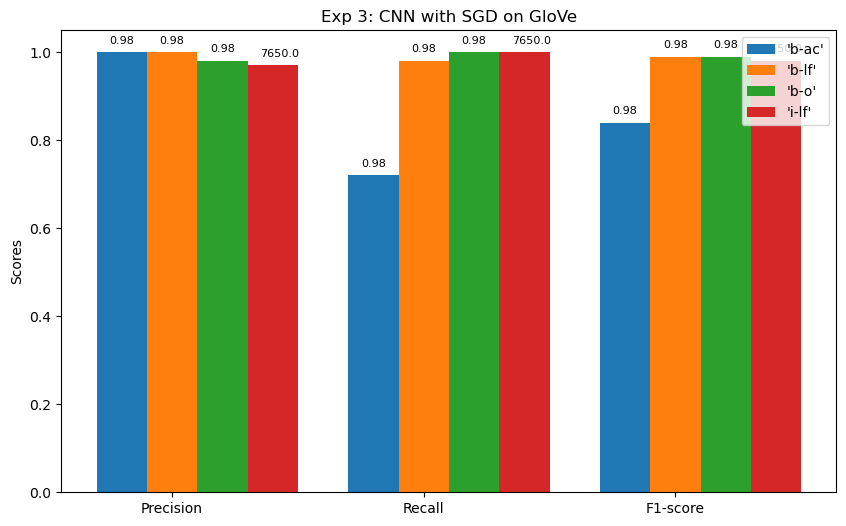

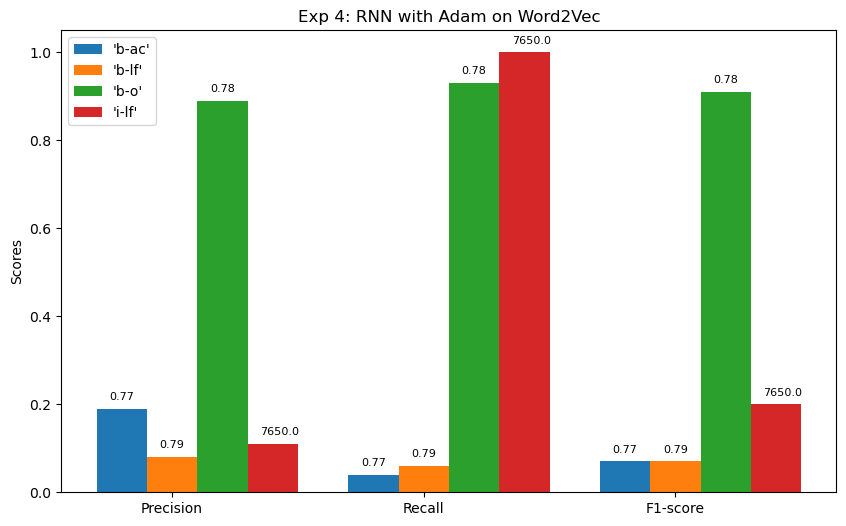

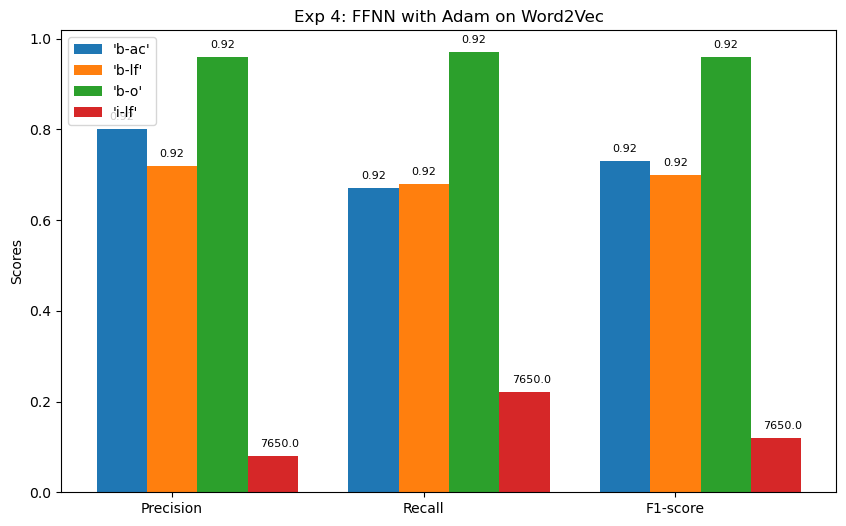

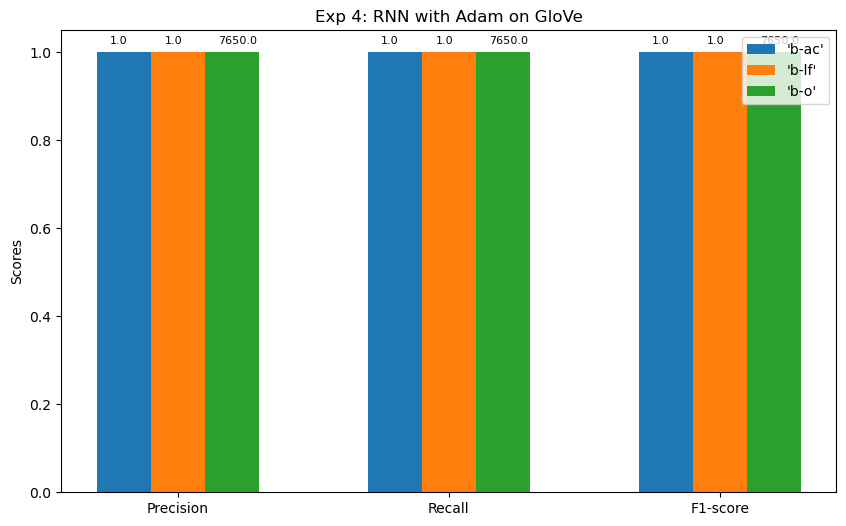

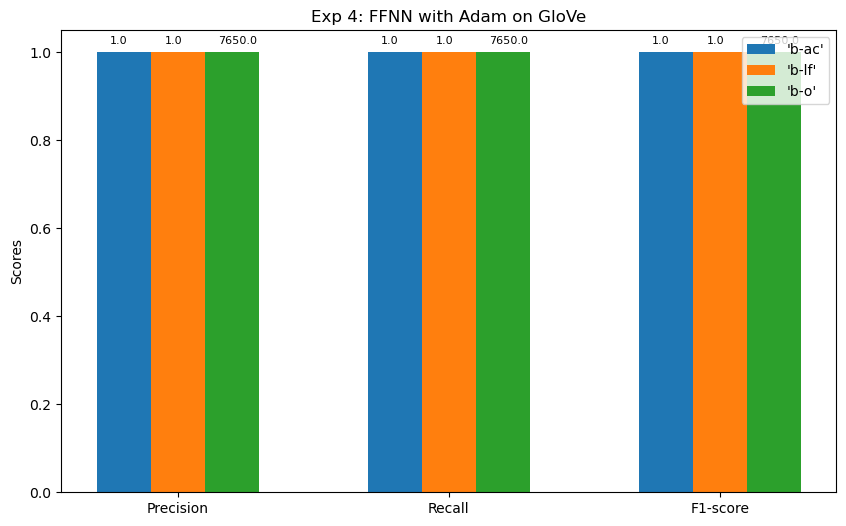

In [67]:
# Function to plot the label scores for the models
def plot_classification_report(classification_report, title='Classification Report'):
    lines = classification_report.split('\n')
    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        t = line.strip().split()
        if len(t) == 0:
            break
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)
    support = [float(x) for x in lines[-2].strip().split()[-len(classes):]]
    plotMat = np.array(plotMat)
    x = np.arange(3)
    width = 0.2
    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(len(classes)):
        ax.bar(x + i * width, plotMat[i], width, label='{}'.format(classes[i]))
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x + width)
    ax.set_xticklabels(['Precision', 'Recall', 'F1-score'])
    ax.legend(loc='best')
    for i in range(len(classes)):
        for j in range(3):
            plt.text(x[j] + i * width - 0.05, plotMat[i][j] + 0.02, support[i], fontsize=8)
    plt.show()

# Plotting comparisons in sequence labelling
plot_classification_report(class_report_1, title='Exp 1: RNN with Adam on Spacy')
plot_classification_report(class_report_2, title='Exp 1: RNN with RMSprop on Spacy')
plot_classification_report(class_report_3, title='Exp 1: CNN with Adam on Spacy')
plot_classification_report(class_report_4, title='Exp 1: CNN with SGD on Spacy')
plot_classification_report(class_report_5, title='Exp 2: RNN with Adam on Word Indexing')
plot_classification_report(class_report_6, title='Exp 2: RNN with SGD on Word Indexing')
plot_classification_report(class_report_7, title='Exp 2: CNN with Adam on Word Indexing')
plot_classification_report(class_report_8, title='Exp 2: CNN with SGD on Word Indexing')
plot_classification_report(class_report_9, title='Exp 3: CNN with Adam on Word2Vec')
plot_classification_report(class_report_10, title='Exp 3: CNN with SGD on Word2Vec')
plot_classification_report(class_report_11, title='Exp 3: CNN with Adam on GloVe')
plot_classification_report(class_report_12, title='Exp 3: CNN with SGD on GloVe')
plot_classification_report(class_report_13, title='Exp 4: RNN with Adam on Word2Vec')
plot_classification_report(class_report_14, title='Exp 4: FFNN with Adam on Word2Vec')
plot_classification_report(class_report_15, title='Exp 4: RNN with Adam on GloVe')
plot_classification_report(class_report_16, title='Exp 4: FFNN with Adam on GloVe')

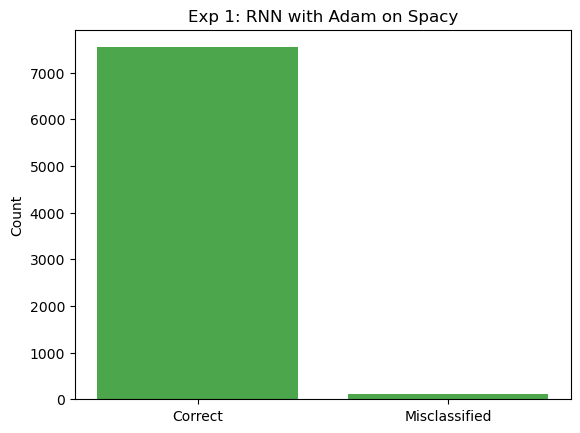

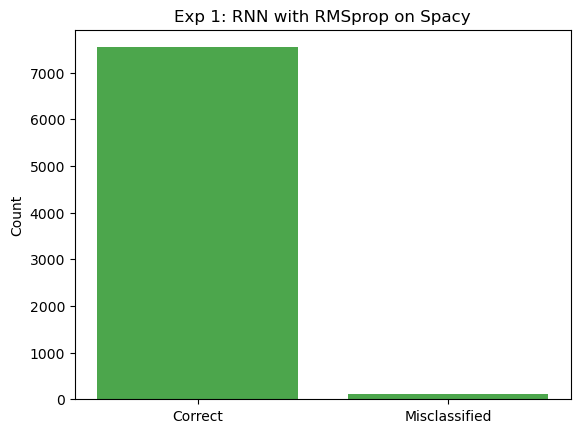

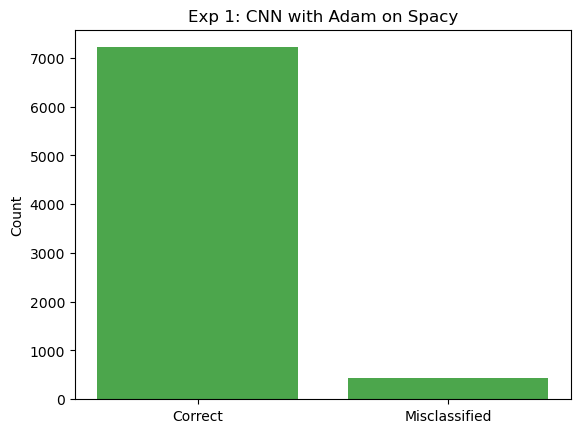

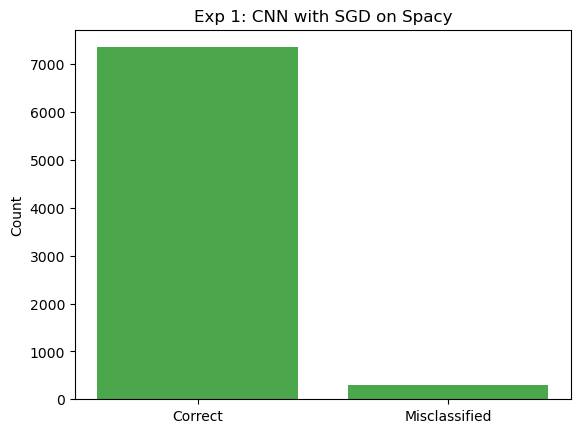

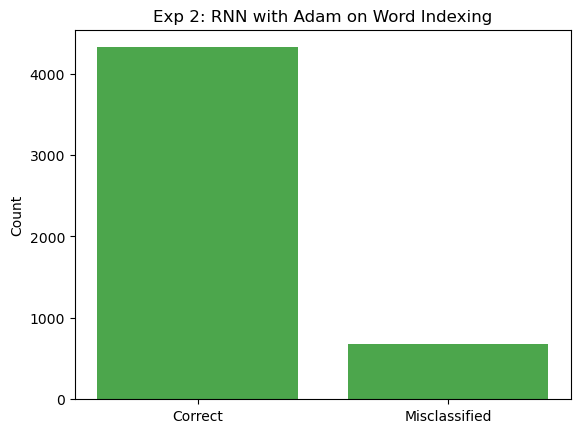

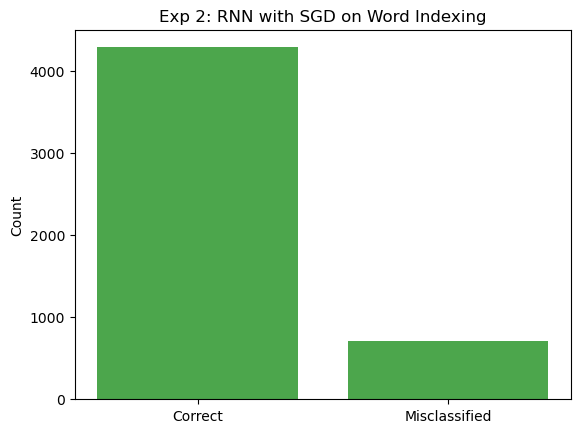

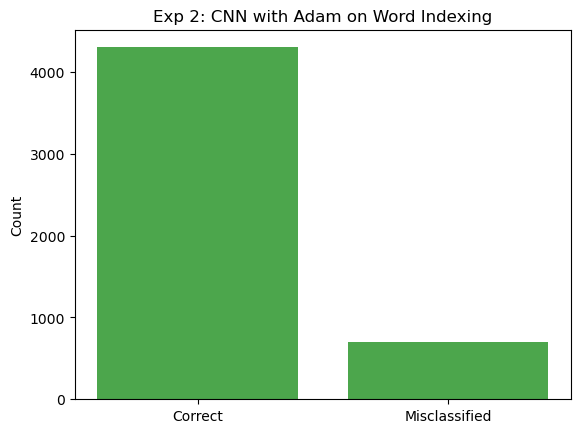

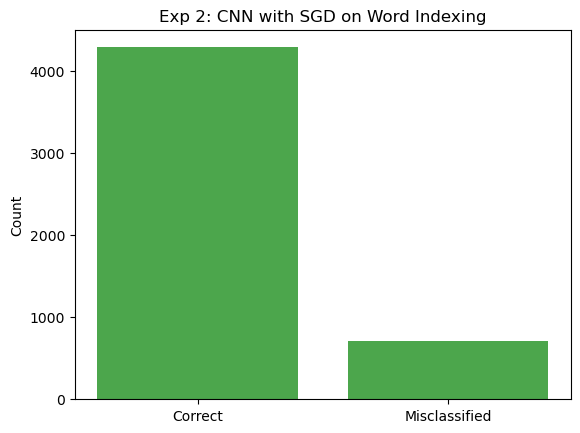

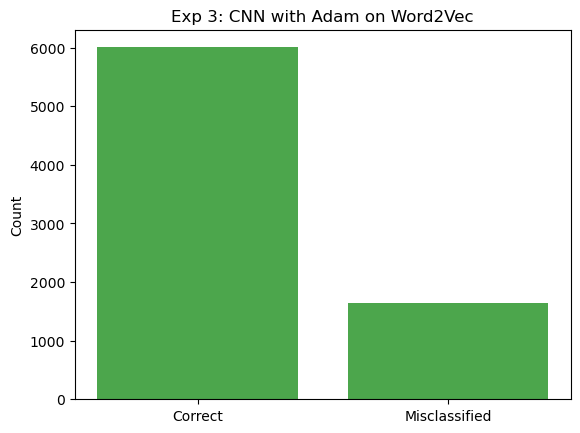

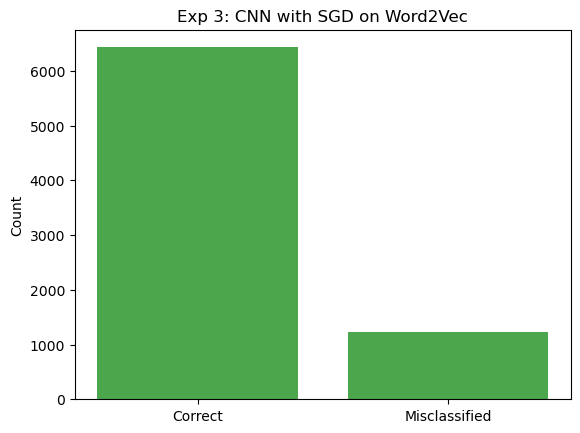

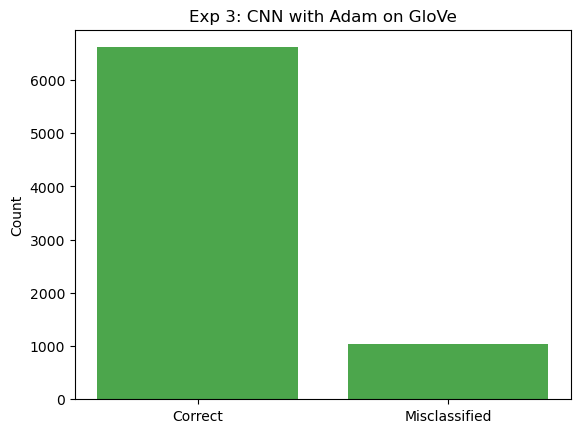

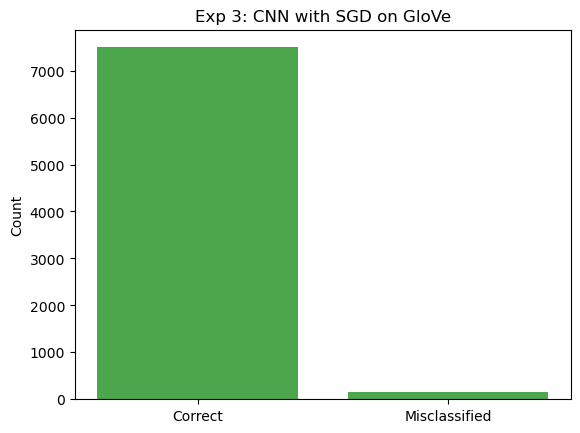

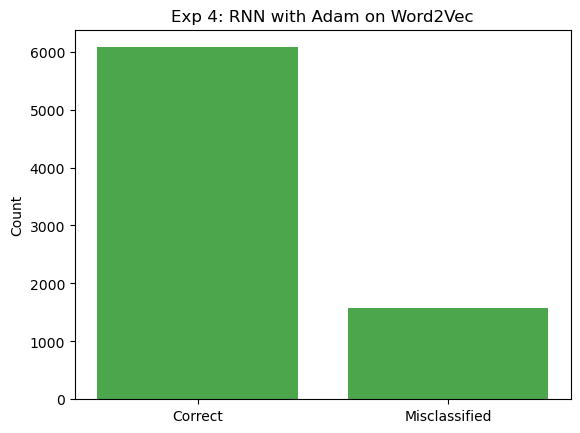

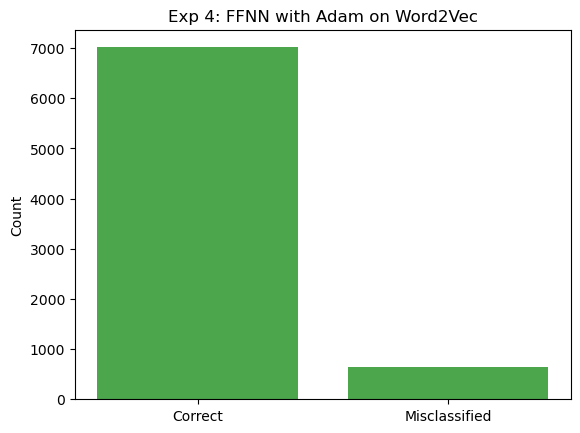

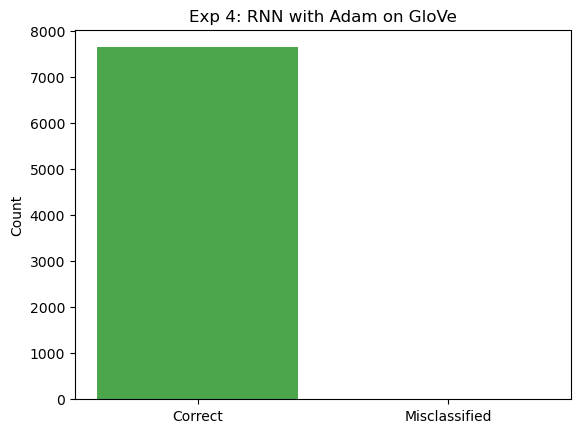

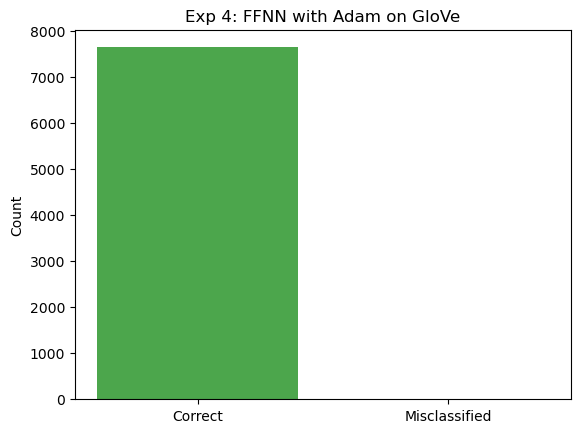

In [68]:
# function to plot correct vs wrong classifications 
def plot_confusion_matrix(conf_matrix, title):
    correct = np.diag(conf_matrix)
    misclassified = np.sum(conf_matrix, axis=1) - correct
    labels = ['Correct', 'Misclassified']
    values = [np.sum(correct), np.sum(misclassified)]
    x = np.arange(len(labels))
    plt.bar(x, values, align='center', alpha=0.7, color='green')
    plt.xticks(x, labels)
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

# Plotting misclassification plots for all the experiments
plot_confusion_matrix(conf_matrix_1, title='Exp 1: RNN with Adam on Spacy')
plot_confusion_matrix(conf_matrix_2, title='Exp 1: RNN with RMSprop on Spacy')
plot_confusion_matrix(conf_matrix_3, title='Exp 1: CNN with Adam on Spacy')
plot_confusion_matrix(conf_matrix_4, title='Exp 1: CNN with SGD on Spacy')
plot_confusion_matrix(conf_matrix_5, title='Exp 2: RNN with Adam on Word Indexing')
plot_confusion_matrix(conf_matrix_6, title='Exp 2: RNN with SGD on Word Indexing')
plot_confusion_matrix(conf_matrix_7, title='Exp 2: CNN with Adam on Word Indexing')
plot_confusion_matrix(conf_matrix_8, title='Exp 2: CNN with SGD on Word Indexing')
plot_confusion_matrix(conf_matrix_9, title='Exp 3: CNN with Adam on Word2Vec')
plot_confusion_matrix(conf_matrix_10, title='Exp 3: CNN with SGD on Word2Vec')
plot_confusion_matrix(conf_matrix_11, title='Exp 3: CNN with Adam on GloVe')
plot_confusion_matrix(conf_matrix_12, title='Exp 3: CNN with SGD on GloVe')
plot_confusion_matrix(conf_matrix_13, title='Exp 4: RNN with Adam on Word2Vec')
plot_confusion_matrix(conf_matrix_14, title='Exp 4: FFNN with Adam on Word2Vec')
plot_confusion_matrix(conf_matrix_15, title='Exp 4: RNN with Adam on GloVe')
plot_confusion_matrix(conf_matrix_16, title='Exp 4: FFNN with Adam on GloVe')

### End of Notebook